In [36]:
import pandas as pd
import matplotlib.pyplot as plt

df_cleaned_drop_IF = pd.read_csv('./Data/cleaned_drop_IF.csv')
df_cleaned_drop_IQR = pd.read_csv('./Data/cleaned_drop_IQR.csv')
df_cleaned_mean_IF = pd.read_csv('./Data/cleaned_mean_IF.csv')
df_cleaned_mean_IQR = pd.read_csv('./Data/cleaned_mean_IQR.csv')
df_cleaned_median_IF = pd.read_csv('./Data/cleaned_median_IF.csv')
df_cleaned_median_IQR = pd.read_csv('./Data/cleaned_median_IQR.csv')

df_cleaned_drop_IF = df_cleaned_drop_IF 

### Data Cleaning: `df_cleaned_drop_IF`

- Dropped the following columns due to irrelevance or redundancy:
  - `from_airport_code`
  - `dest_airport_code`
  - `airline_number`
  - `flight_number`
  - `currency`
  - `co2_emissions`
  - `avg_co2_emission_for_this_route`
  - `co2_percentage`
  - `scan_date`

- Converted `departure_time` and `arrival_time` (e.g., `2022-05-02 16:00:00`, `2022-05-04 06:00:00`) into categorical time slots:
  - `Early_Morning`
  - `Morning`
  - `Afternoon`
  - `Evening`
  - `Night`


In [37]:
# Drop specified columns
df_cleaned_drop_IF = df_cleaned_drop_IF.drop(columns=[
    'from_airport_code',
    'dest_airport_code',
    'airline_number',
    'flight_number',
    'currency',
    'co2_emissions',
    'avg_co2_emission_for_this_route',
    'co2_percentage',
    'scan_date'
])

# Convert duration from minutes to hours (assuming 'duration' is in minutes)
df_cleaned_drop_IF['duration'] = df_cleaned_drop_IF['duration'] / 60

In [38]:
import pandas as pd

# Define a function to convert hour to time of day
def time_of_day(hour):
    if 0 <= hour < 5:
        return 'Early_Morning'
    elif 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Convert strings to datetime if necessary
df_cleaned_drop_IF['departure_time'] = pd.to_datetime(df_cleaned_drop_IF['departure_time'])
df_cleaned_drop_IF['arrival_time'] = pd.to_datetime(df_cleaned_drop_IF['arrival_time'])

# Apply the function to get time of day categories
df_cleaned_drop_IF['departure_time_of_day'] = df_cleaned_drop_IF['departure_time'].dt.hour.apply(time_of_day)
df_cleaned_drop_IF['arrival_time_of_day'] = df_cleaned_drop_IF['arrival_time'].dt.hour.apply(time_of_day)

# Drop the original datetime columns if no longer needed
df_cleaned_drop_IF = df_cleaned_drop_IF.drop(columns=['departure_time', 'arrival_time'])


In [39]:
df_cleaned_drop_IF

from_country dest_country  \
0           Canada     Ethiopia   
1            Egypt        Japan   
2        Australia        India   
3            China      Germany   
4           Canada  South Korea   
...            ...          ...   
99990      Austria     Columbia   
99991       Brazil       Canada   
99992      Denmark     Columbia   
99993       Brazil       Canada   
99994      Austria     Columbia   

                                           aircraft_type  \
0       Airbus A220-300 Passenger|Boeing 777|Airbus A350   
1                     Airbus A330|Airbus A320|Boeing 787   
2                                  Boeing 737|Boeing 787   
3                      Boeing 737|Boeing 787|Embraer 190   
4                                Airbus A321|Airbus A350   
...                                                  ...   
99990          Canadair RJ 900|Airbus A320neo|Boeing 787   
99991  Boeing 737|Boeing 777|Bombardier Regional Jet 550   
99992              Airbus A321|Airbus A320neo|Boeing 787   
99993  Airbus A320|Boeing 777|Bombardier Regional Jet...   
99994                 Airbus A320|Airbus A320|Boeing 787   

                     airline_name   duration  stops   price  \
0         [Air Canada| Ethiopian]  31.000000      2   820.0   
1      [EgyptAir| Saudia| Etihad]  30.583333      2  7754.0   
2             [Qantas| Air India]  32.166667      1  5225.0   
3                [XiamenAir| KLM]  47.750000      2  2200.0   
4                         [Delta]  20.583333      1   990.0   
...                           ...        ...    ...     ...   
99990        [Lufthansa| Avianca]  21.233333      2  1657.0   
99991               [Gol| United]  23.833333      2  1673.0   
99992        [Lufthansa| Avianca]  22.566667      2  1721.0   
99993             [LATAM| United]  19.750000      2  1673.0   
99994        [Lufthansa| Avianca]  18.000000      2  1622.0   

      departure_time_of_day arrival_time_of_day  
0                 Afternoon             Morning  
1                     Night           Afternoon  
2                 Afternoon           Afternoon  
3                   Evening             Morning  
4                   Morning           Afternoon  
...                     ...                 ...  
99990             Afternoon       Early_Morning  
99991               Morning             Morning  
99992               Morning       Early_Morning  
99993             Afternoon             Morning  
99994               Morning             Evening  

[99995 rows x 9 columns]

In [40]:
df_cleaned_drop_IF.columns

Index(['from_country', 'dest_country', 'aircraft_type', 'airline_name',
       'duration', 'stops', 'price', 'departure_time_of_day',
       'arrival_time_of_day'],
      dtype='object')

### Feature Engineering

In [41]:
df_cleaned_drop_IF

from_country dest_country  \
0           Canada     Ethiopia   
1            Egypt        Japan   
2        Australia        India   
3            China      Germany   
4           Canada  South Korea   
...            ...          ...   
99990      Austria     Columbia   
99991       Brazil       Canada   
99992      Denmark     Columbia   
99993       Brazil       Canada   
99994      Austria     Columbia   

                                           aircraft_type  \
0       Airbus A220-300 Passenger|Boeing 777|Airbus A350   
1                     Airbus A330|Airbus A320|Boeing 787   
2                                  Boeing 737|Boeing 787   
3                      Boeing 737|Boeing 787|Embraer 190   
4                                Airbus A321|Airbus A350   
...                                                  ...   
99990          Canadair RJ 900|Airbus A320neo|Boeing 787   
99991  Boeing 737|Boeing 777|Bombardier Regional Jet 550   
99992              Airbus A321|Airbus A320neo|Boeing 787   
99993  Airbus A320|Boeing 777|Bombardier Regional Jet...   
99994                 Airbus A320|Airbus A320|Boeing 787   

                     airline_name   duration  stops   price  \
0         [Air Canada| Ethiopian]  31.000000      2   820.0   
1      [EgyptAir| Saudia| Etihad]  30.583333      2  7754.0   
2             [Qantas| Air India]  32.166667      1  5225.0   
3                [XiamenAir| KLM]  47.750000      2  2200.0   
4                         [Delta]  20.583333      1   990.0   
...                           ...        ...    ...     ...   
99990        [Lufthansa| Avianca]  21.233333      2  1657.0   
99991               [Gol| United]  23.833333      2  1673.0   
99992        [Lufthansa| Avianca]  22.566667      2  1721.0   
99993             [LATAM| United]  19.750000      2  1673.0   
99994        [Lufthansa| Avianca]  18.000000      2  1622.0   

      departure_time_of_day arrival_time_of_day  
0                 Afternoon             Morning  
1                     Night           Afternoon  
2                 Afternoon           Afternoon  
3                   Evening             Morning  
4                   Morning           Afternoon  
...                     ...                 ...  
99990             Afternoon       Early_Morning  
99991               Morning             Morning  
99992               Morning       Early_Morning  
99993             Afternoon             Morning  
99994               Morning             Evening  

[99995 rows x 9 columns]

In [42]:
import category_encoders as ce

# Get object columns
cat_cols = df_cleaned_drop_IF.select_dtypes(include='object').columns

# Initialize and apply target encoder
encoder = ce.TargetEncoder(cols=cat_cols)
df_encoded = encoder.fit_transform(df_cleaned_drop_IF[cat_cols], df_cleaned_drop_IF['price'])

# Merge the encoded values back into the original DataFrame
df_cleaned_drop_IF = pd.concat([df_cleaned_drop_IF, df_encoded.add_suffix('_mean_encoded')], axis=1)


1. Smoothed Target Mean Encoding (Best for avoiding overfitting)
Instead of directly mapping each category to its mean price, smooth the mean using overall average to prevent overfitting — especially helpful when some categories have very few samples.

In [43]:
def smooth_target_encoding(df, column, target, weight=100):
    global_mean = df[target].mean()
    agg = df.groupby(column)[target].agg(['mean', 'count'])
    smoothing = (agg['count'] * agg['mean'] + weight * global_mean) / (agg['count'] + weight)
    return df[column].map(smoothing)


In [44]:
df_cleaned_drop_IF['departure_time_smooth_encoded'] = smooth_target_encoding(
    df_cleaned_drop_IF, 'departure_time_of_day', 'price'
)
df_cleaned_drop_IF['arrival_time_smooth_encoded'] = smooth_target_encoding(
    df_cleaned_drop_IF, 'arrival_time_of_day', 'price'
)
df_cleaned_drop_IF['from_country_smooth_encoded'] = smooth_target_encoding(
    df_cleaned_drop_IF, 'from_country', 'price'
)
df_cleaned_drop_IF['dest_country_smooth_encoded'] = smooth_target_encoding(
    df_cleaned_drop_IF, 'dest_country', 'price'
)
df_cleaned_drop_IF['airline_name_smooth_encoded'] = smooth_target_encoding(
    df_cleaned_drop_IF, 'airline_name', 'price'
)
df_cleaned_drop_IF['aircraft_type_smooth_encoded'] = smooth_target_encoding(
    df_cleaned_drop_IF, 'aircraft_type', 'price'
)

In [45]:
df_cleaned_drop_IF

from_country dest_country  \
0           Canada     Ethiopia   
1            Egypt        Japan   
2        Australia        India   
3            China      Germany   
4           Canada  South Korea   
...            ...          ...   
99990      Austria     Columbia   
99991       Brazil       Canada   
99992      Denmark     Columbia   
99993       Brazil       Canada   
99994      Austria     Columbia   

                                           aircraft_type  \
0       Airbus A220-300 Passenger|Boeing 777|Airbus A350   
1                     Airbus A330|Airbus A320|Boeing 787   
2                                  Boeing 737|Boeing 787   
3                      Boeing 737|Boeing 787|Embraer 190   
4                                Airbus A321|Airbus A350   
...                                                  ...   
99990          Canadair RJ 900|Airbus A320neo|Boeing 787   
99991  Boeing 737|Boeing 777|Bombardier Regional Jet 550   
99992              Airbus A321|Airbus A320neo|Boeing 787   
99993  Airbus A320|Boeing 777|Bombardier Regional Jet...   
99994                 Airbus A320|Airbus A320|Boeing 787   

                     airline_name   duration  stops   price  \
0         [Air Canada| Ethiopian]  31.000000      2   820.0   
1      [EgyptAir| Saudia| Etihad]  30.583333      2  7754.0   
2             [Qantas| Air India]  32.166667      1  5225.0   
3                [XiamenAir| KLM]  47.750000      2  2200.0   
4                         [Delta]  20.583333      1   990.0   
...                           ...        ...    ...     ...   
99990        [Lufthansa| Avianca]  21.233333      2  1657.0   
99991               [Gol| United]  23.833333      2  1673.0   
99992        [Lufthansa| Avianca]  22.566667      2  1721.0   
99993             [LATAM| United]  19.750000      2  1673.0   
99994        [Lufthansa| Avianca]  18.000000      2  1622.0   

      departure_time_of_day arrival_time_of_day  from_country_mean_encoded  \
0                 Afternoon             Morning                1185.855724   
1                     Night           Afternoon                1103.122350   
2                 Afternoon           Afternoon                1744.178830   
3                   Evening             Morning                2688.940989   
4                   Morning           Afternoon                1185.855724   
...                     ...                 ...                        ...   
99990             Afternoon       Early_Morning                1057.748906   
99991               Morning             Morning                1827.208654   
99992               Morning       Early_Morning                 927.759627   
99993             Afternoon             Morning                1827.208654   
99994               Morning             Evening                1057.748906   

       ...  aircraft_type_mean_encoded  airline_name_mean_encoded  \
0      ...                 1503.565874                1294.999222   
1      ...                 2923.651056                2016.242734   
2      ...                 1340.538835                2230.962970   
3      ...                 2015.575145                2056.255609   
4      ...                 1295.225109                1230.751762   
...    ...                         ...                        ...   
99990  ...                 1426.091005                1526.011321   
99991  ...                 1514.607636                2011.133641   
99992  ...                 1633.401392                1526.011321   
99993  ...                 1528.935650                2443.660891   
99994  ...                 2110.907311                1526.011321   

       departure_time_of_day_mean_encoded  arrival_time_of_day_mean_encoded  \
0                             1425.517938                       1524.139488   
1                             1754.014809                       1474.291837   
2                             1425.517938                       1474.291837   
3                        

In [46]:
# Step 1: Clean and split the string into a list of airline names
airline_split = (
    df_cleaned_drop_IF['airline_name']
    .str.strip('[]')                      # remove brackets
    .str.split('|')                       # split by delimiter
    .apply(lambda x: [a.strip() for a in x])  # strip spaces
)

# Step 2: Expand the list into 6 strings (pad with "None" as string)
airline_expanded = airline_split.apply(
    lambda x: x + ["None"]*(6 - len(x)) if len(x) < 6 else x[:6]
)

# Step 3: Create 6 new string columns
for i in range(6):
    df_cleaned_drop_IF[f'airline_{i+1}'] = airline_expanded.apply(lambda x: x[i])



In [47]:
df_cleaned_drop_IF[df_cleaned_drop_IF['stops'] == 5]

from_country dest_country  \
64410       Canada  Netherlands   

                                        aircraft_type  \
64410  Airbus A330|Boeing 777|Train|Train|Train|Train   

                  airline_name   duration  stops  price departure_time_of_day  \
64410  [Air Canada| AccesRail]  13.316667      5  974.0               Evening   

      arrival_time_of_day  from_country_mean_encoded  ...  \
64410           Afternoon                1185.855724  ...   

       from_country_smooth_encoded  dest_country_smooth_encoded  \
64410                  1189.580331                  1154.691465   

       airline_name_smooth_encoded  aircraft_type_smooth_encoded   airline_1  \
64410                  1421.321683                   1421.321683  Air Canada   

       airline_2  airline_3  airline_4  airline_5  airline_6  
64410  AccesRail       None       None       None       None  

[1 rows x 27 columns]

In [48]:
# df_cleaned_drop_IF['airline_1_smooth_encoded'] = smooth_target_encoding(
#     df_cleaned_drop_IF, 'airline_1', 'price'
# )
for i in range(6):
    df_cleaned_drop_IF[f'airline_{i+1}_smooth_encoded'] = smooth_target_encoding(
    df_cleaned_drop_IF, f'airline_{i+1}', 'price'
)

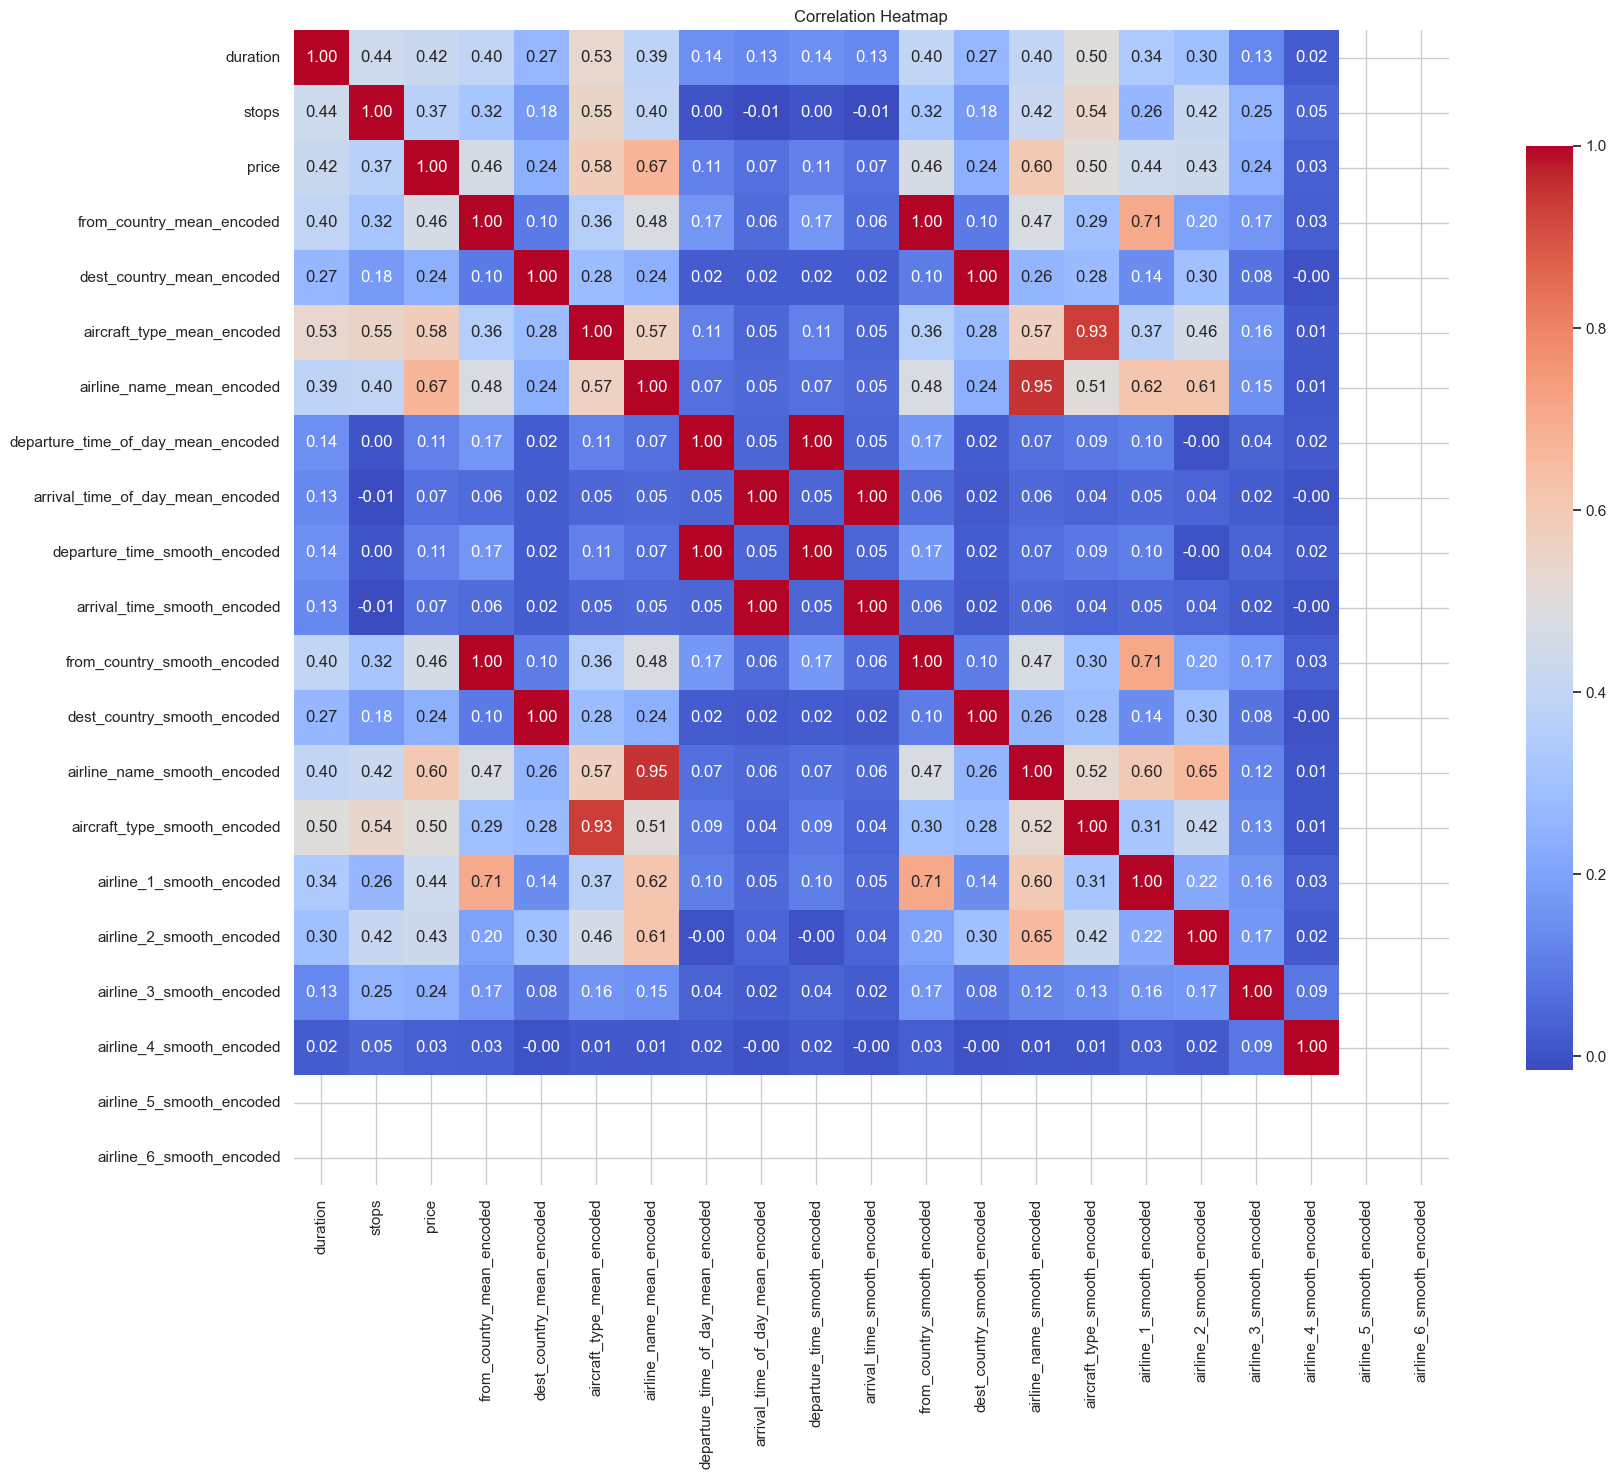

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

df1 = df_cleaned_drop_IF.select_dtypes(include=['float64', 'int64'])

sns.set(style="whitegrid")
plt.figure(figsize=(20, 15))
sns.heatmap(df1.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

### How Does the Ticket Price vary with the number of 'from_country', 'dest_country', 'stops', 'departure_time_of_day', 'arrival_time_of_day'?

C:\Users\punna\AppData\Local\Temp\ipykernel_49320\909802657.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned_drop_IF, x=col, y='price', palette='Set3')


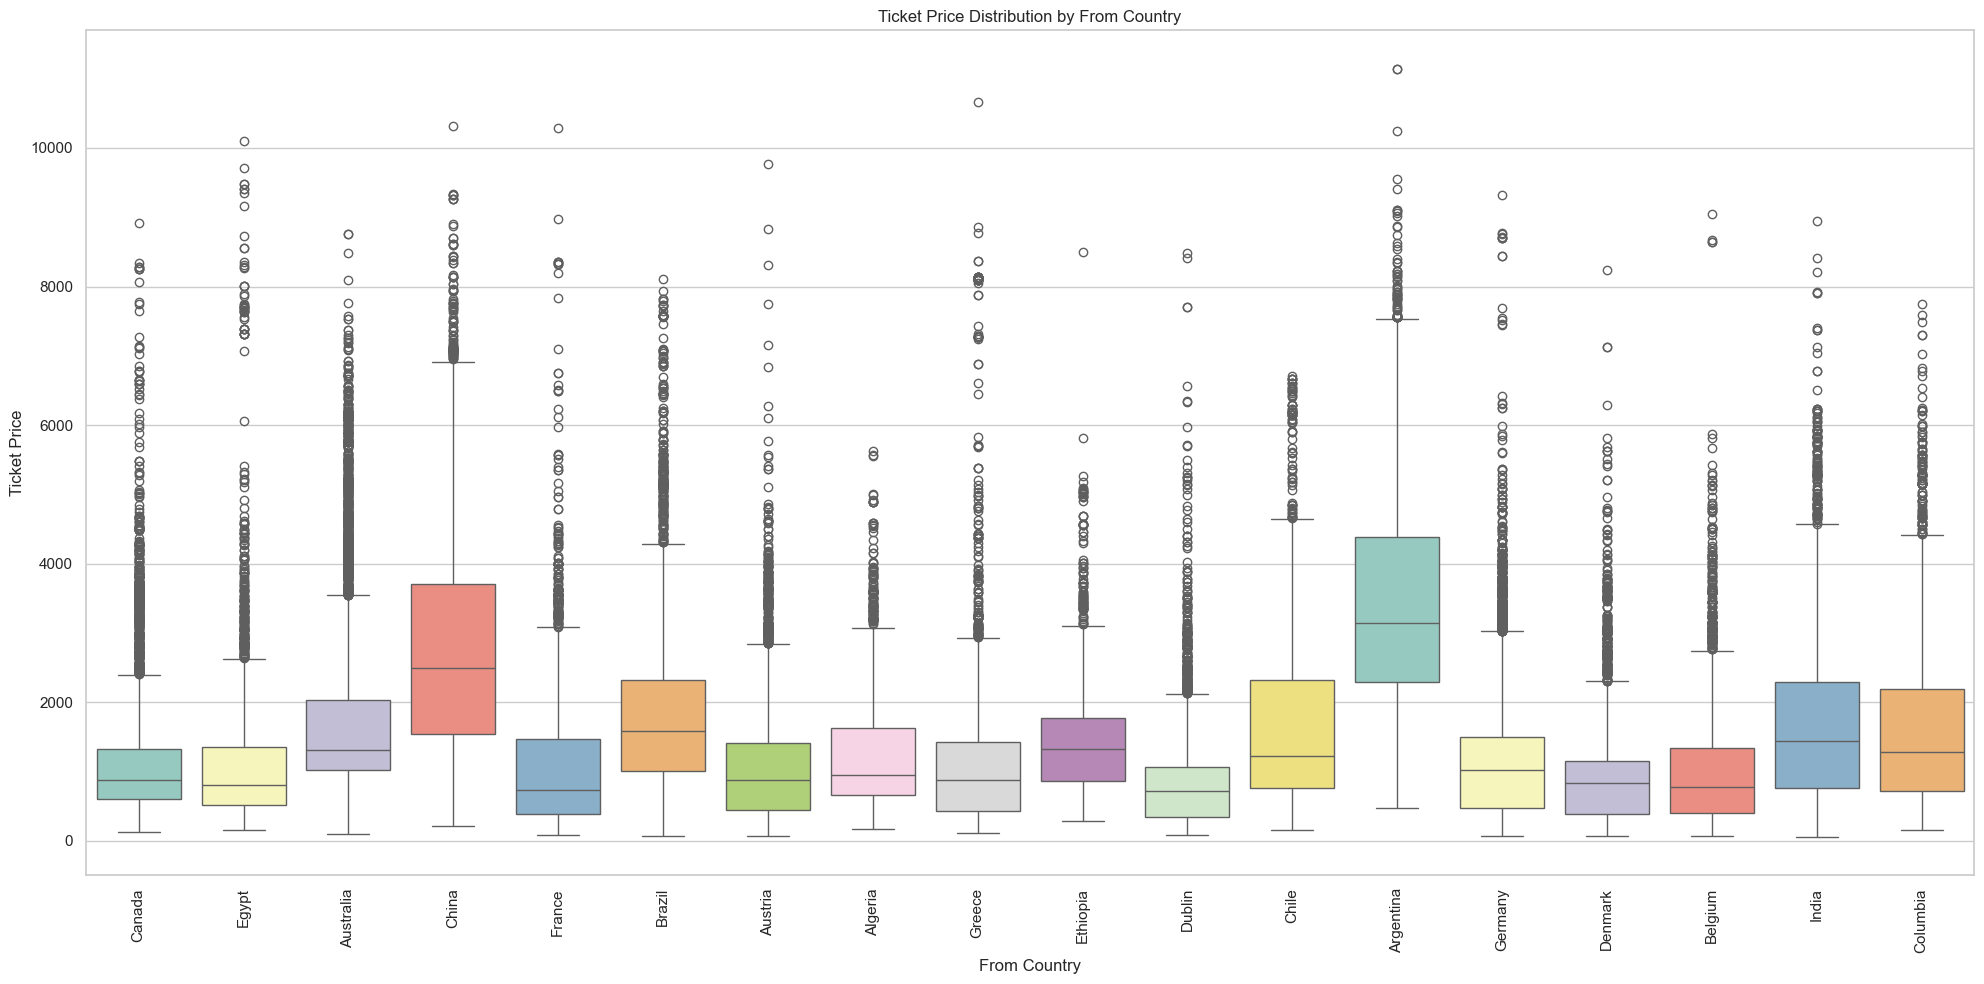

C:\Users\punna\AppData\Local\Temp\ipykernel_49320\909802657.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned_drop_IF, x=col, y='price', palette='Set3')


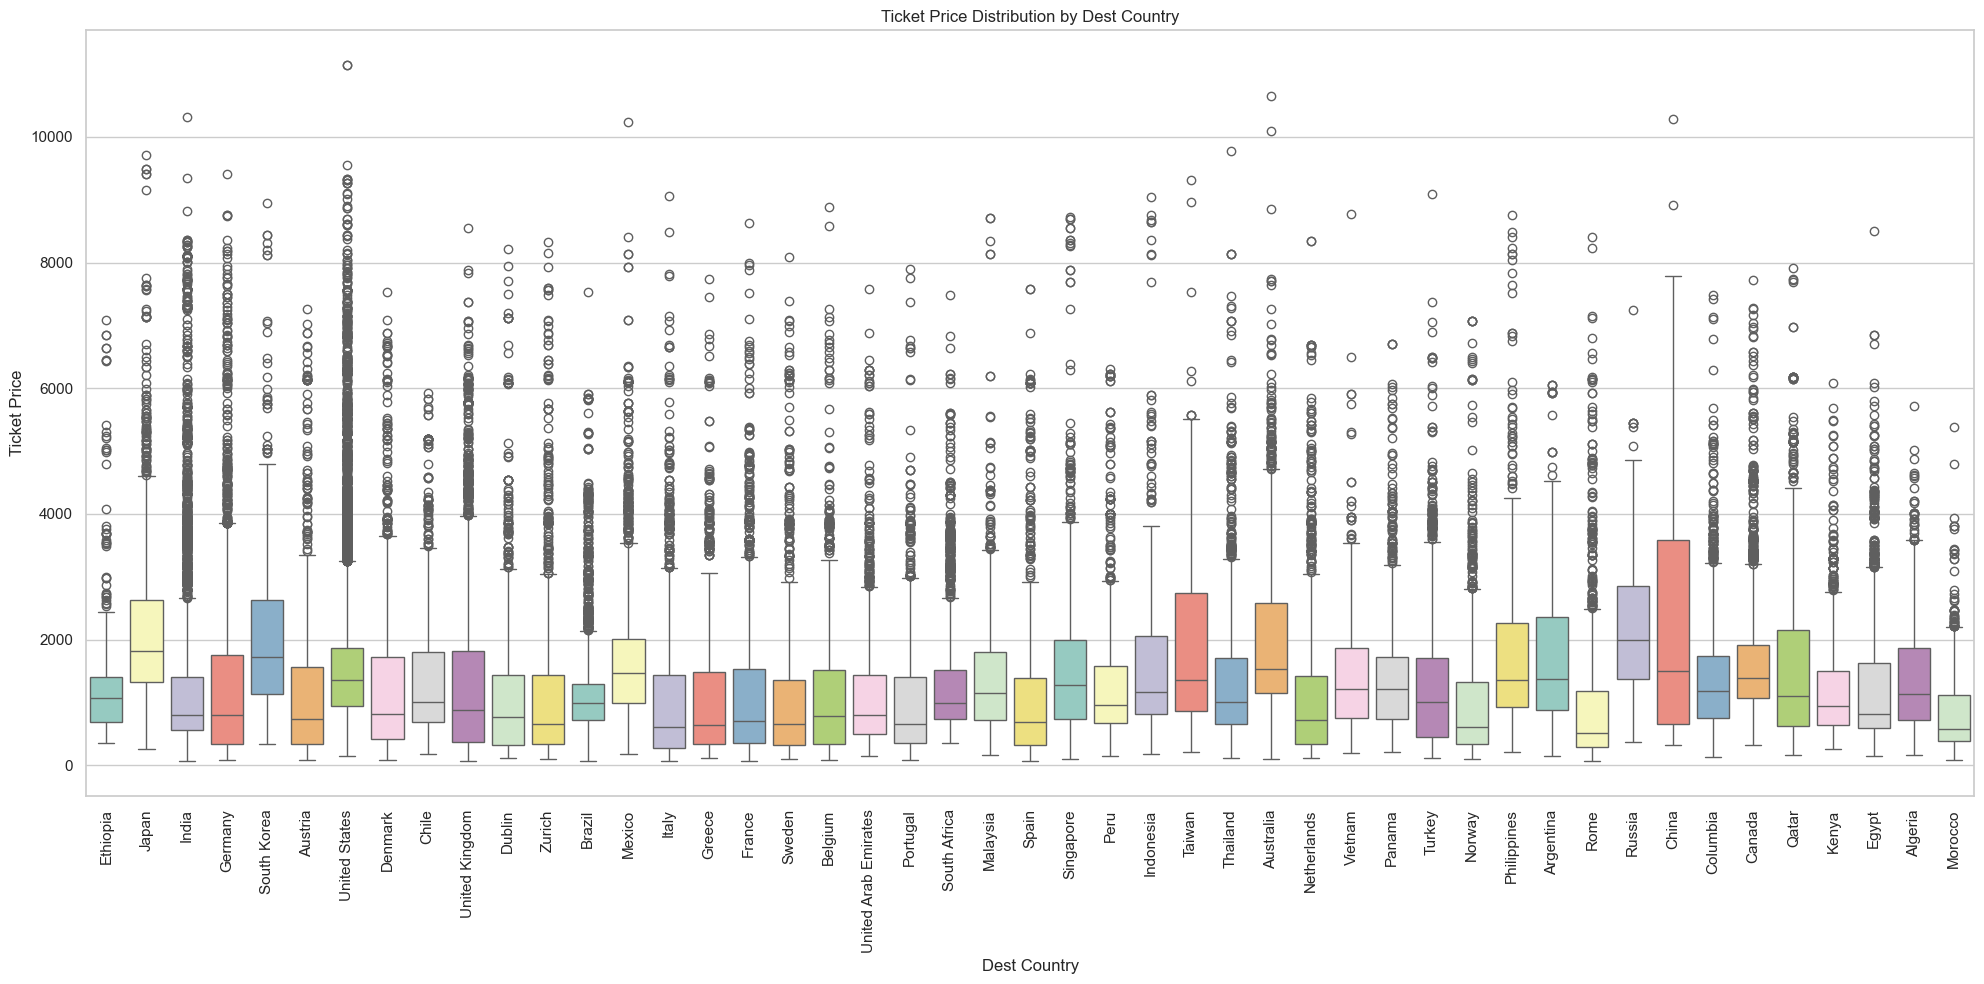

C:\Users\punna\AppData\Local\Temp\ipykernel_49320\909802657.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned_drop_IF, x=col, y='price', palette='Set3')


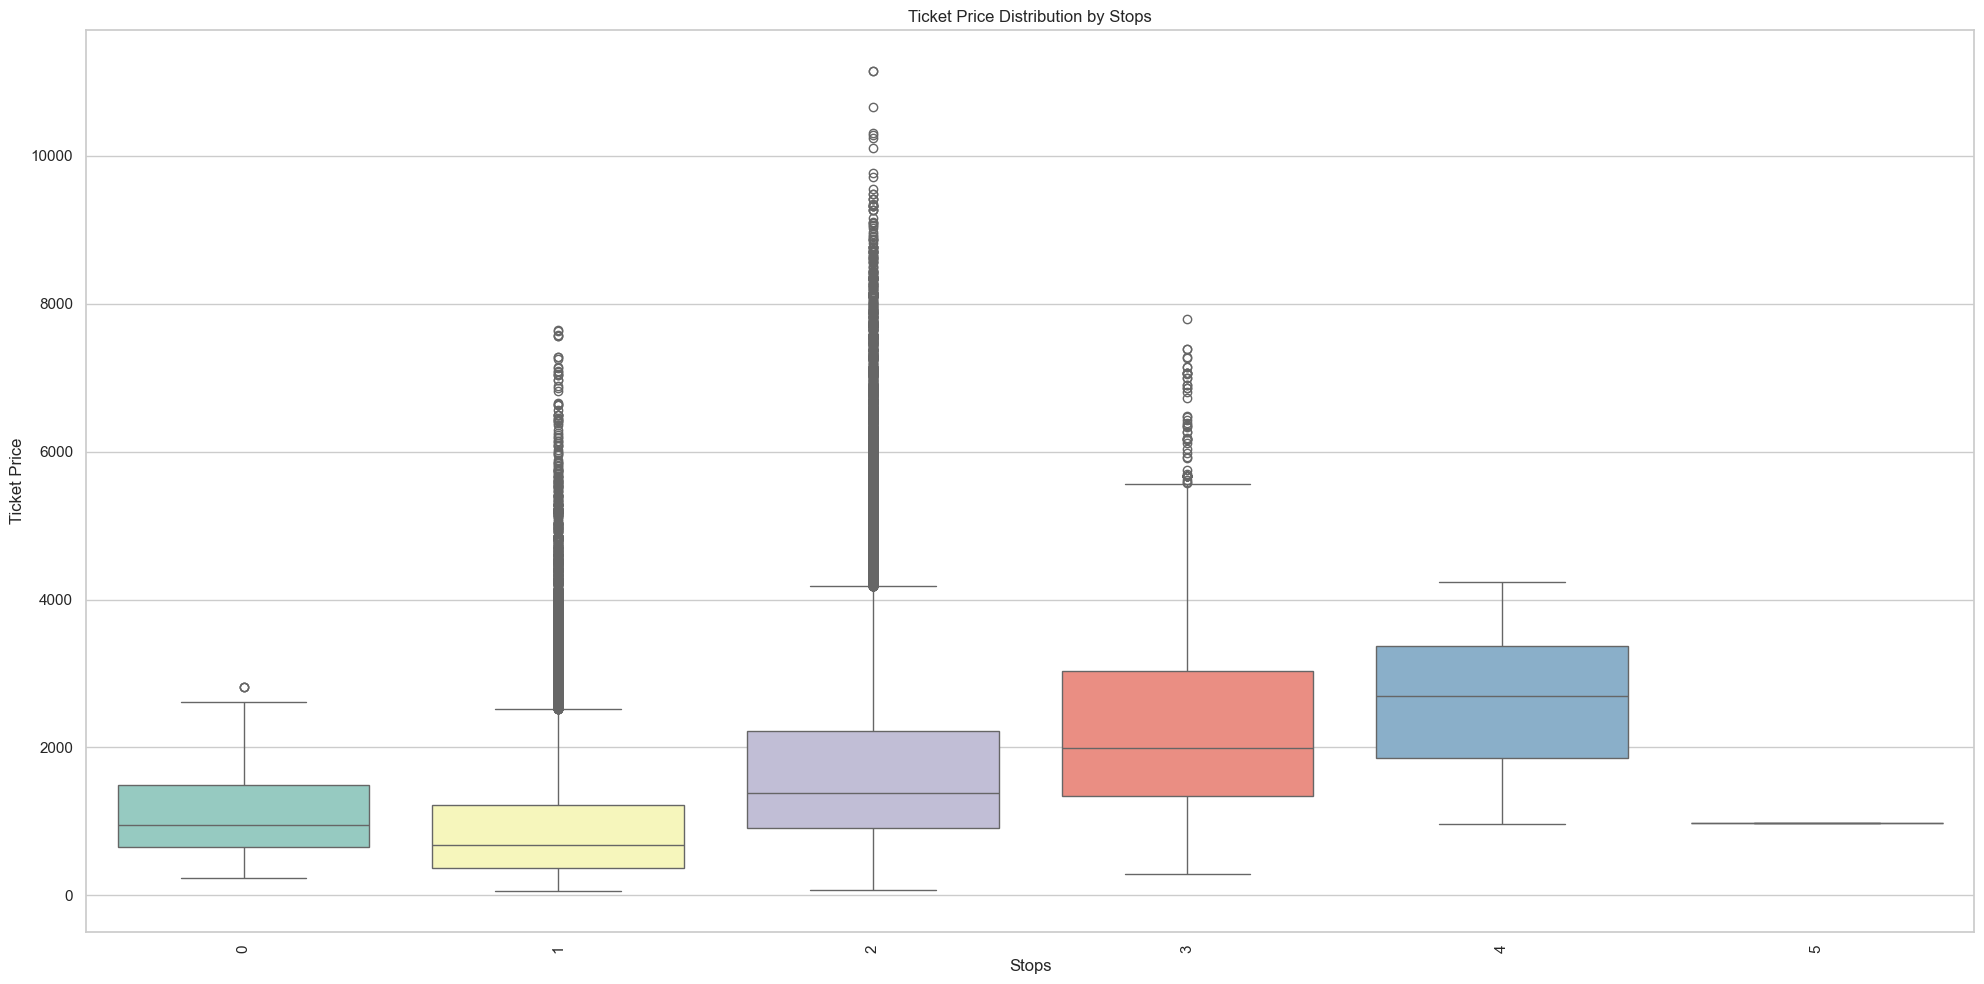

C:\Users\punna\AppData\Local\Temp\ipykernel_49320\909802657.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned_drop_IF, x=col, y='price', palette='Set3')


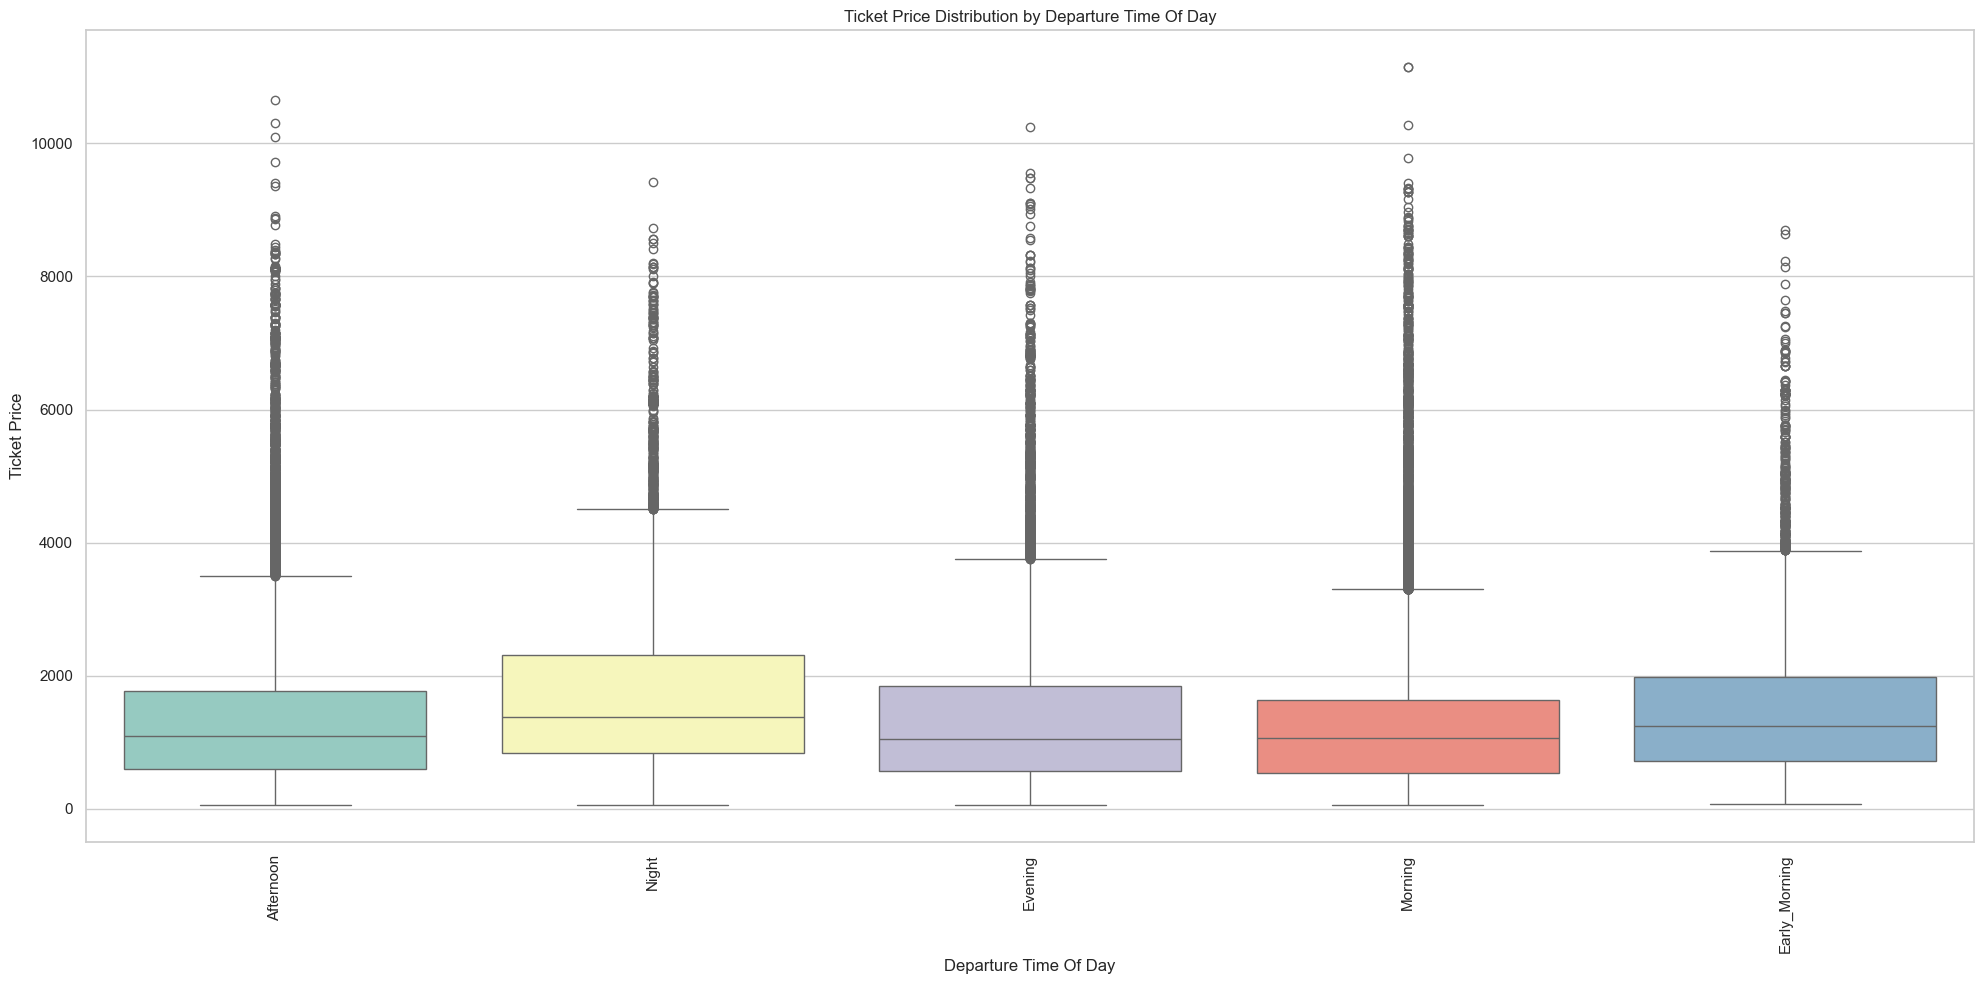

C:\Users\punna\AppData\Local\Temp\ipykernel_49320\909802657.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned_drop_IF, x=col, y='price', palette='Set3')


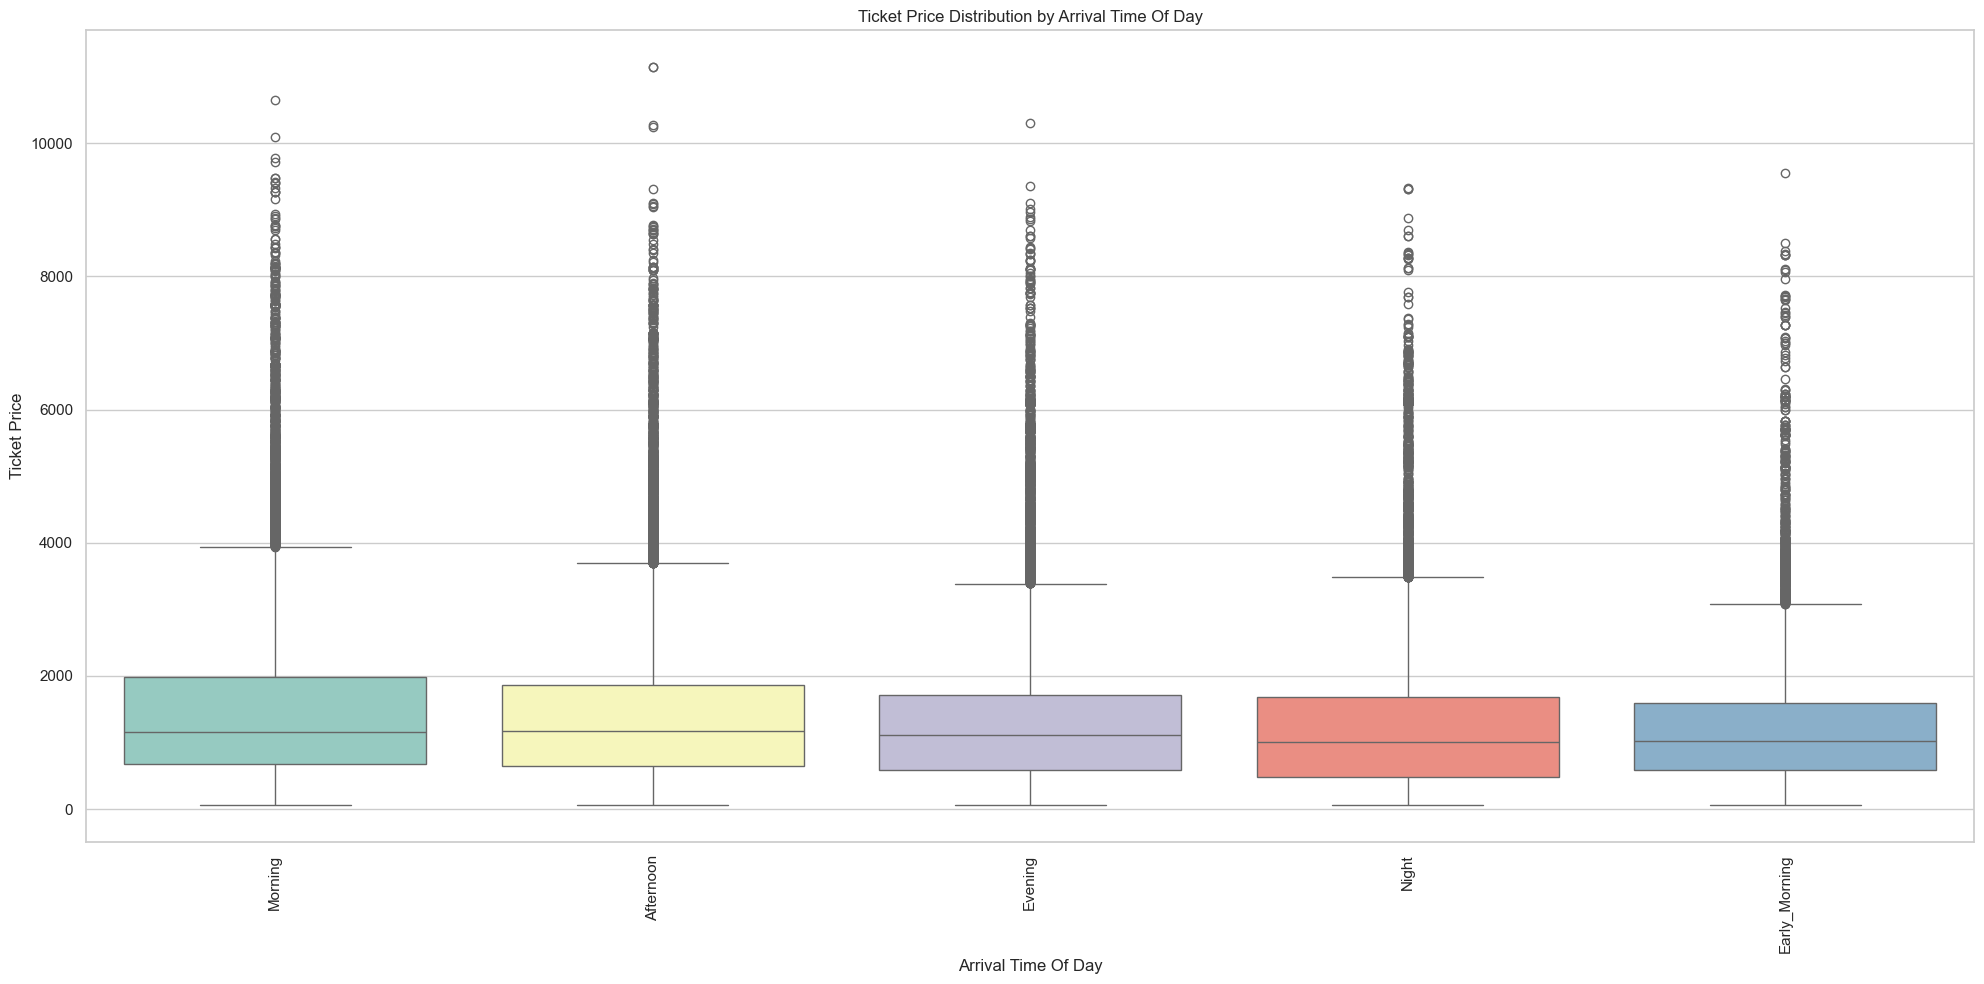

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns to plot against price
categorical_cols = [
    'from_country', 'dest_country', 'stops', 'departure_time_of_day', 'arrival_time_of_day'
]

# Plotting boxplots for each categorical feature vs. price
for col in categorical_cols:
    plt.figure(figsize=(20, 10))
    sns.boxplot(data=df_cleaned_drop_IF, x=col, y='price', palette='Set3')
    plt.xticks(rotation=90)
    plt.title(f'Ticket Price Distribution by {col.replace("_", " ").title()}')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Ticket Price')
    plt.tight_layout()
    plt.show()


C:\Users\punna\AppData\Local\Temp\ipykernel_49320\467767851.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x=col, y='price', palette='Set3')


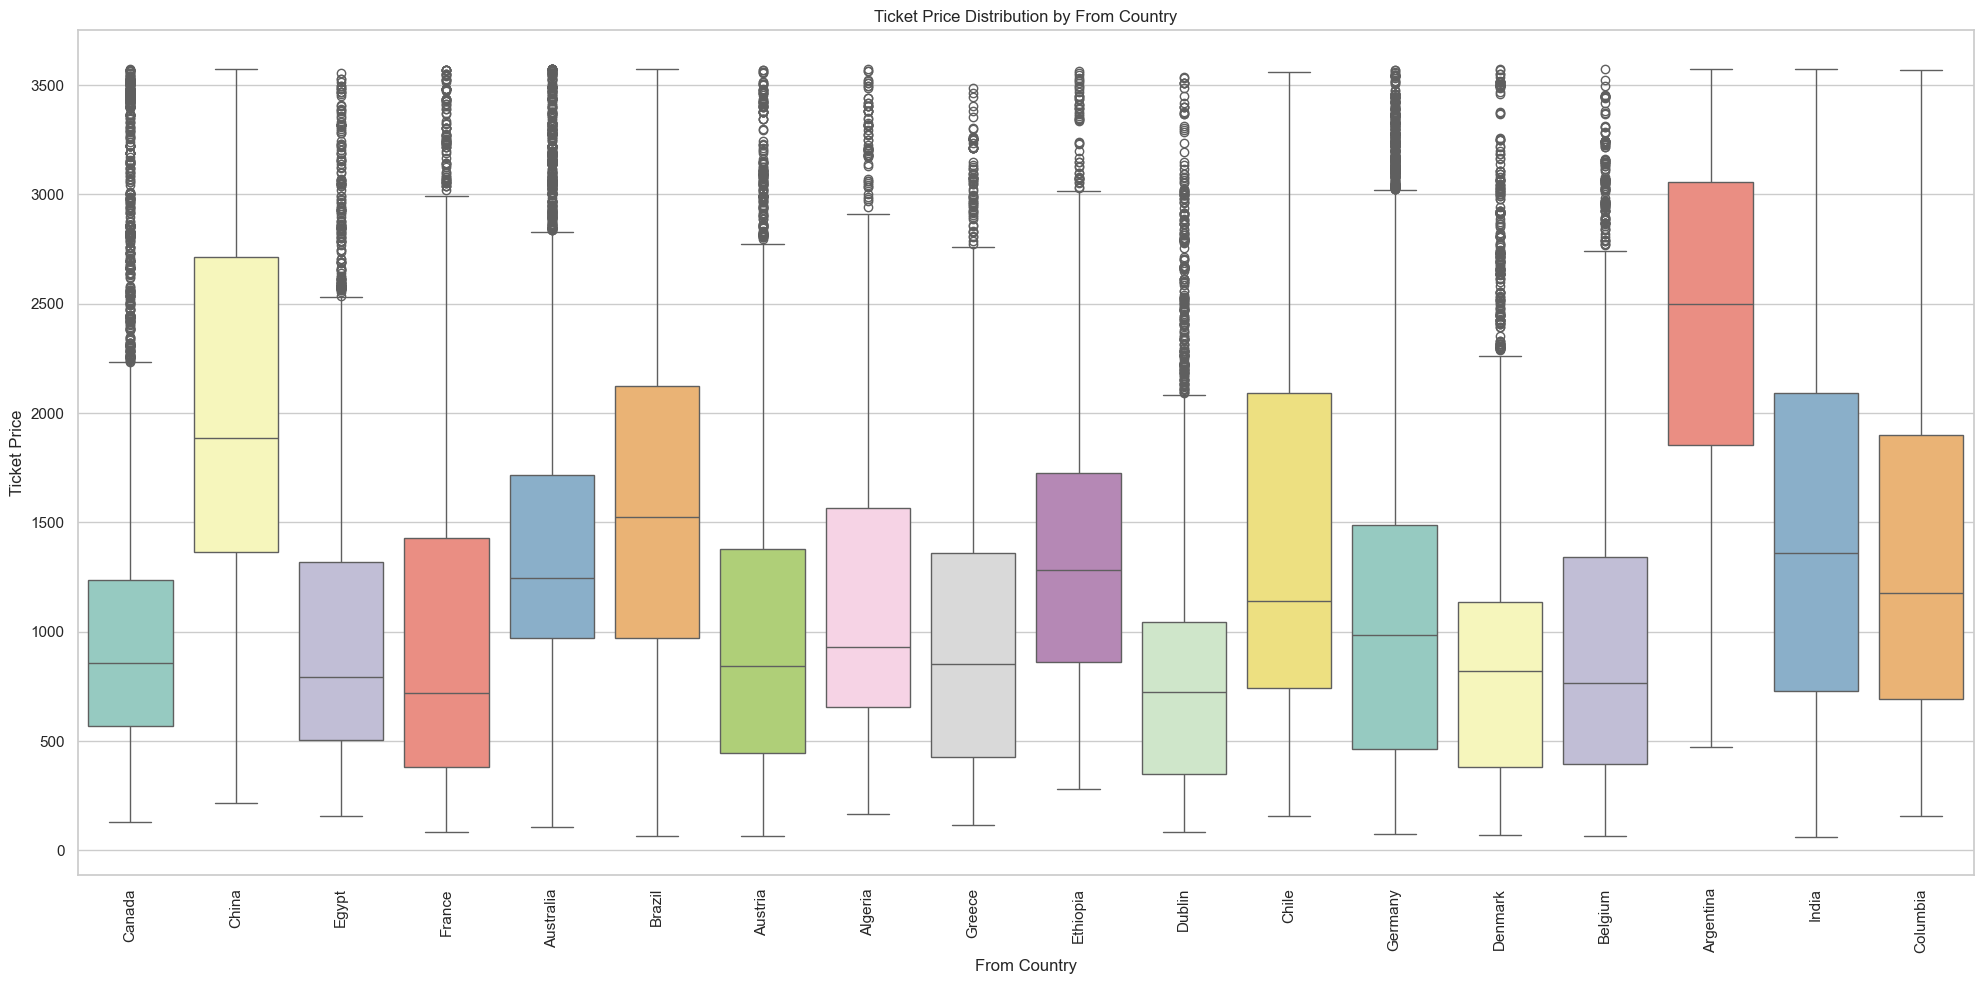

C:\Users\punna\AppData\Local\Temp\ipykernel_49320\467767851.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x=col, y='price', palette='Set3')


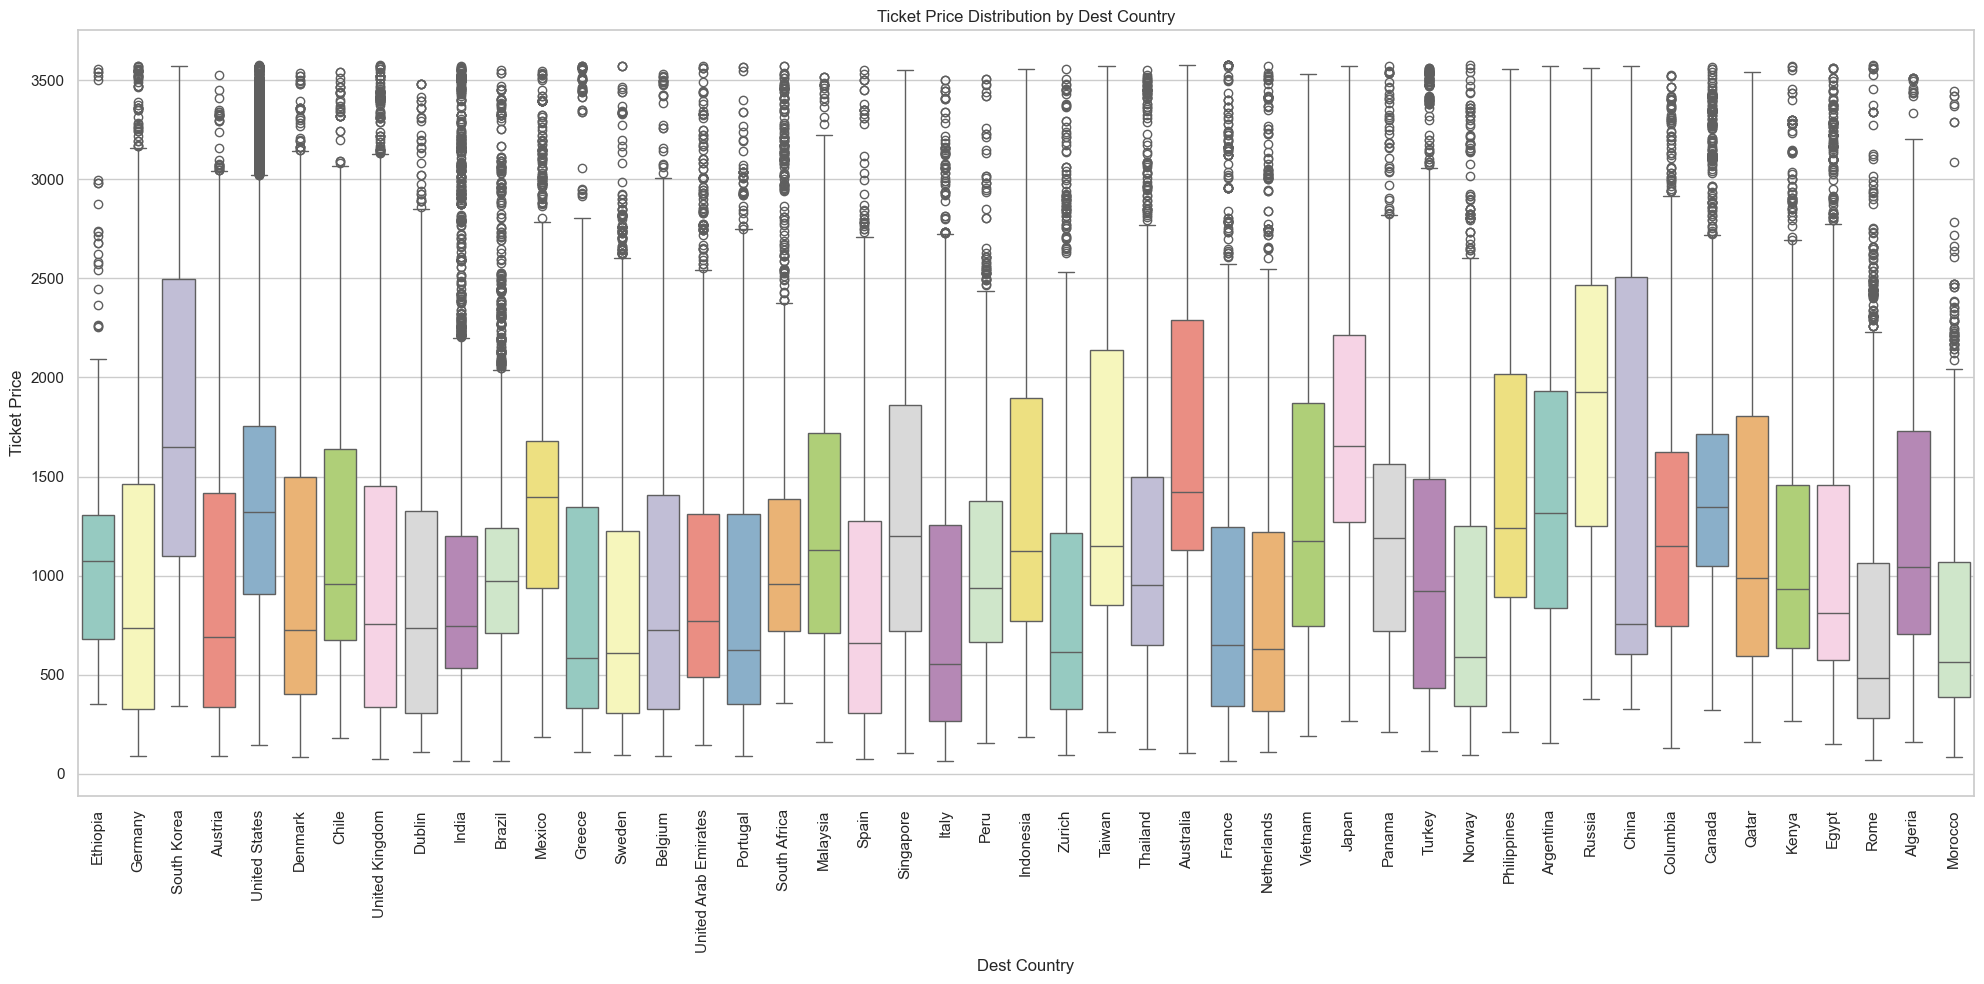

C:\Users\punna\AppData\Local\Temp\ipykernel_49320\467767851.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x=col, y='price', palette='Set3')


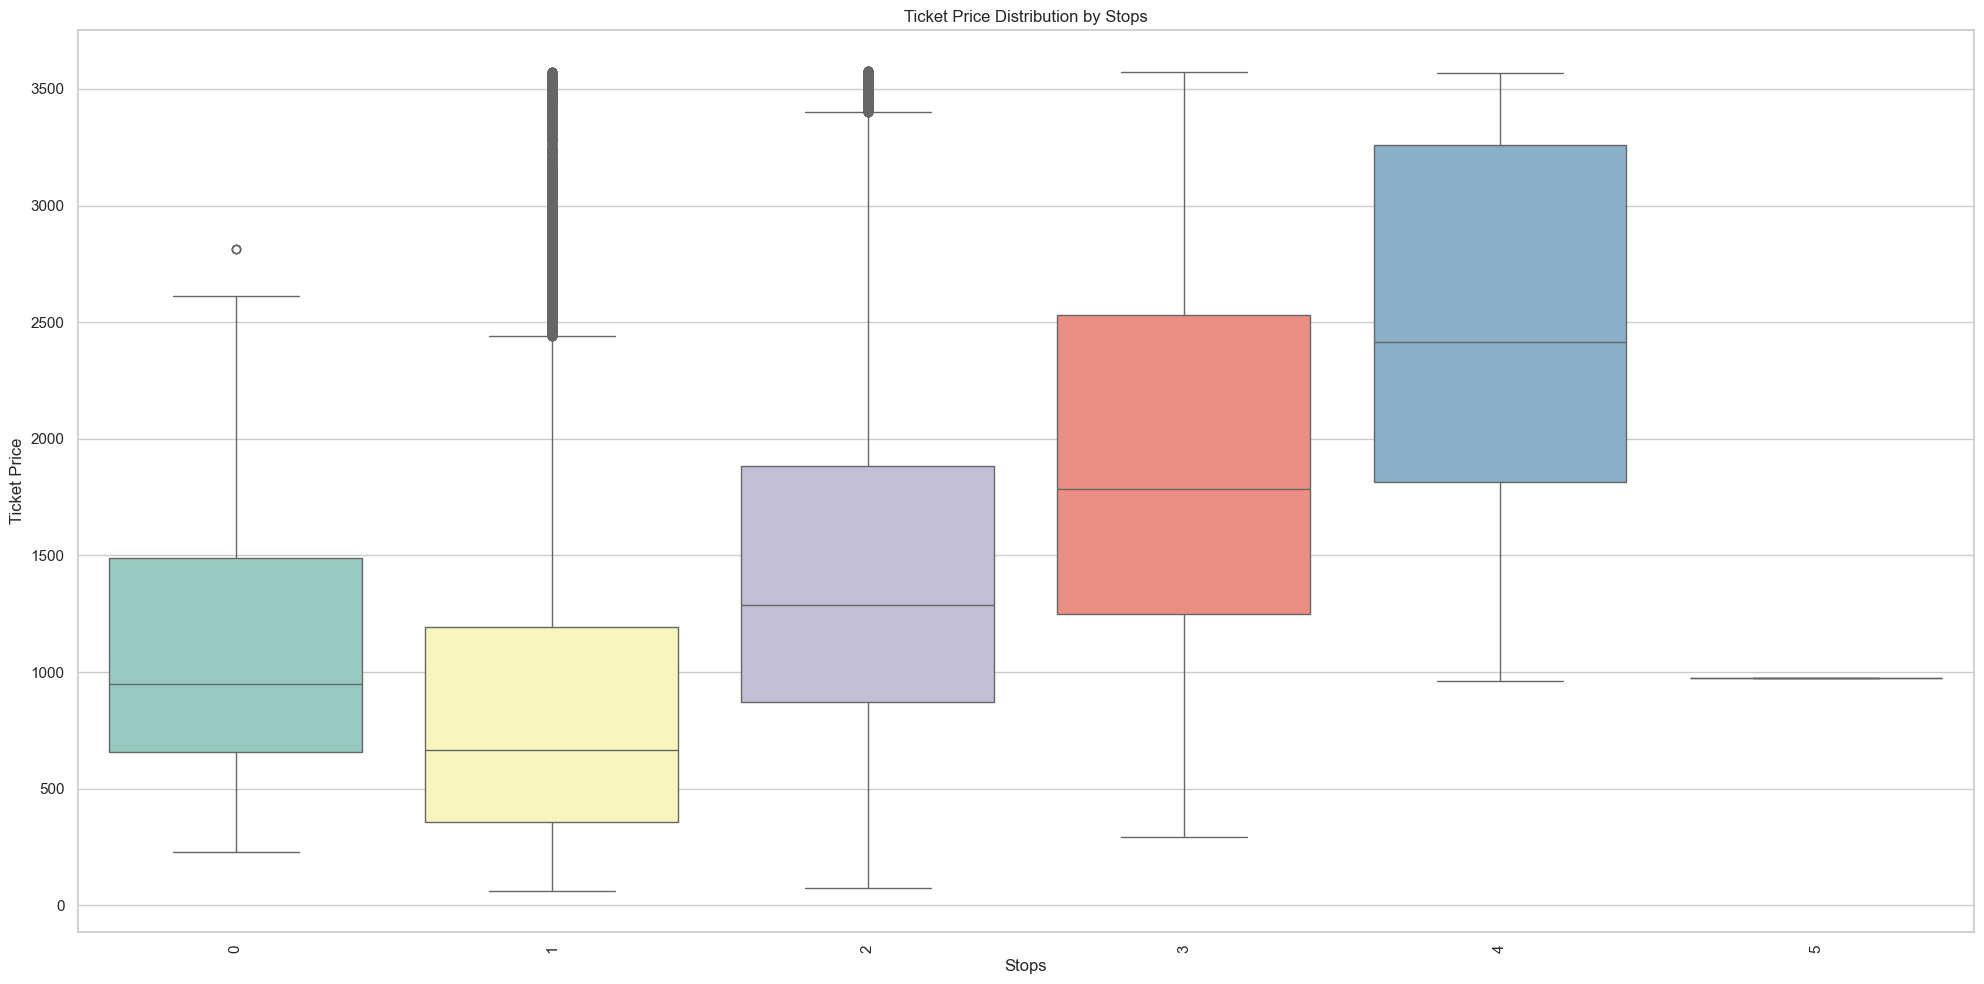

C:\Users\punna\AppData\Local\Temp\ipykernel_49320\467767851.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x=col, y='price', palette='Set3')


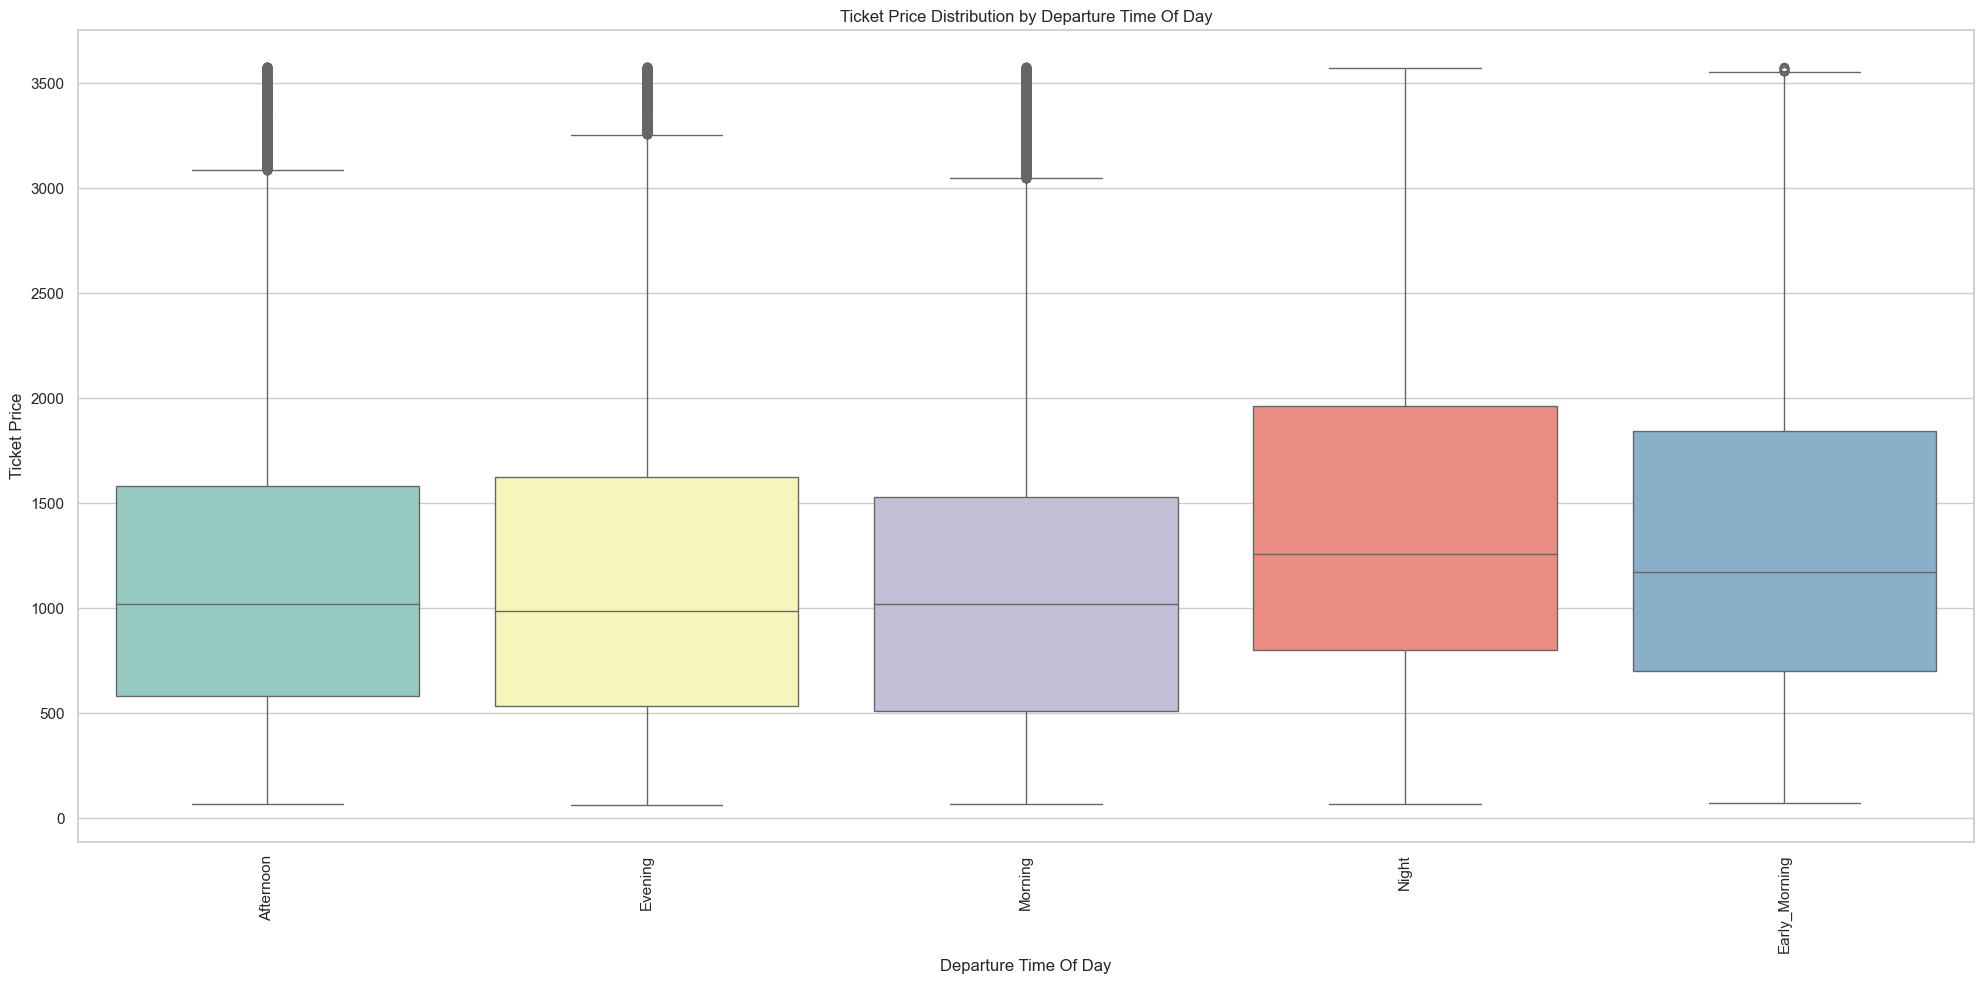

C:\Users\punna\AppData\Local\Temp\ipykernel_49320\467767851.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x=col, y='price', palette='Set3')


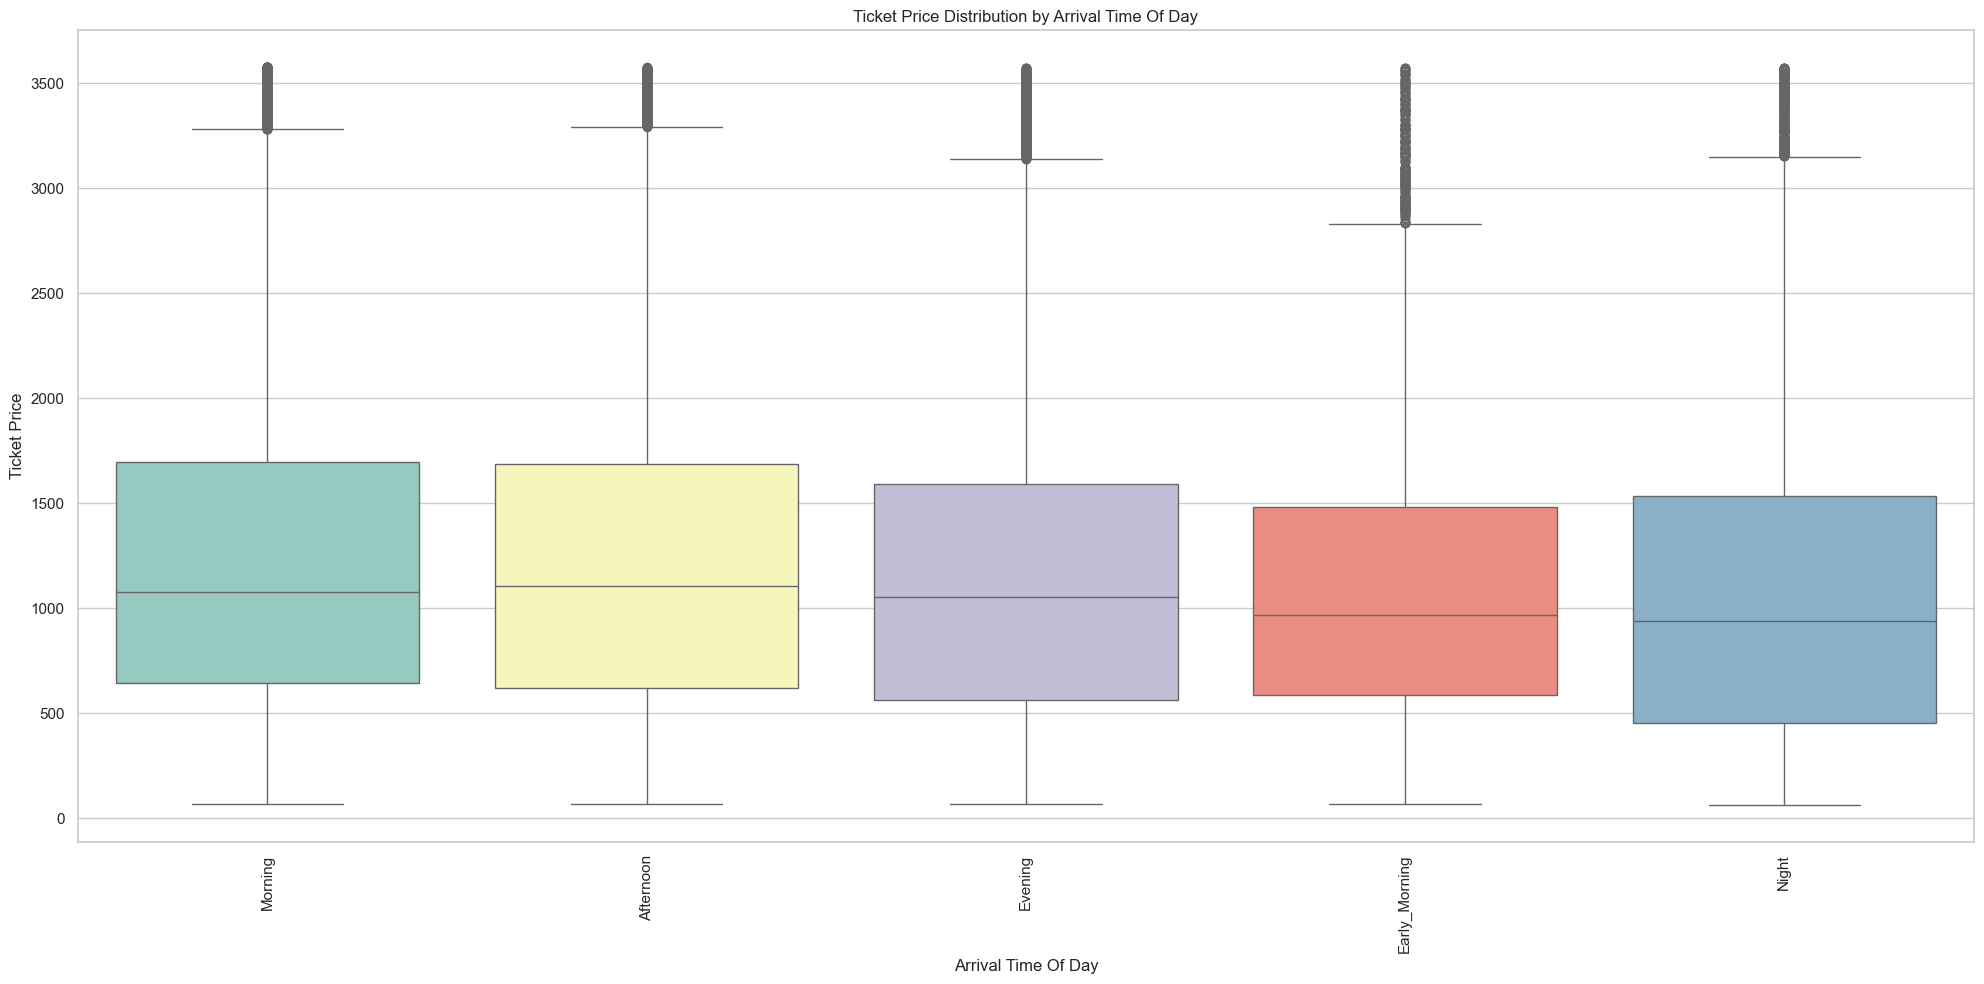

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the IQR for 'price' to filter out outliers
Q1 = df_cleaned_drop_IF['price'].quantile(0.25)
Q3 = df_cleaned_drop_IF['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds to filter out outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_filtered = df_cleaned_drop_IF[(df_cleaned_drop_IF['price'] >= lower_bound) & (df_cleaned_drop_IF['price'] <= upper_bound)]

# List of categorical columns to plot against price
categorical_cols = [
    'from_country', 'dest_country', 'stops', 'departure_time_of_day', 'arrival_time_of_day'
]

# Plotting boxplots for each categorical feature vs. price (after removing outliers)
for col in categorical_cols:
    plt.figure(figsize=(20, 10))
    sns.boxplot(data=df_filtered, x=col, y='price', palette='Set3')
    plt.xticks(rotation=90)
    plt.title(f'Ticket Price Distribution by {col.replace("_", " ").title()}')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Ticket Price')
    plt.tight_layout()
    plt.show()


### Model Linear Regression

In [52]:
from sklearn.preprocessing import LabelEncoder

df = df_cleaned_drop_IF.copy()  

le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [53]:
df

from_country  dest_country  aircraft_type  airline_name   duration  \
0                 6            13            364           332  31.000000   
1                12            20           3895          1879  30.583333   
2                 2            17           5815          2972  32.166667   
3                 8            15           5882          3791  47.750000   
4                 6            36           3420          1719  20.583333   
...             ...           ...            ...           ...        ...   
99990             3             9           8066          2703  21.233333   
99991             5             6           5805          2176  23.833333   
99992            10             9           3238          2703  22.566667   
99993             5             6           2231          2606  19.750000   
99994             3             9           1705          2703  18.000000   

       stops   price  departure_time_of_day  arrival_time_of_day  \
0          2   820.0                      0                    3   
1          2  7754.0                      4                    0   
2          1  5225.0                      0                    0   
3          2  2200.0                      2                    3   
4          1   990.0                      3                    0   
...      ...     ...                    ...                  ...   
99990      2  1657.0                      0                    1   
99991      2  1673.0                      3                    3   
99992      2  1721.0                      3                    1   
99993      2  1673.0                      0                    3   
99994      2  1622.0                      3                    2   

       from_country_mean_encoded  ...  airline_3  airline_4  airline_5  \
0                    1185.855724  ...         64         15          0   
1                    1103.122350  ...         42         15          0   
2                    1744.178830  ...         64         15          0   
3                    2688.940989  ...         64         15          0   
4                    1185.855724  ...         64         15          0   
...                          ...  ...        ...        ...        ...   
99990                1057.748906  ...         64         15          0   
99991                1827.208654  ...         64         15          0   
99992                 927.759627  ...         64         15          0   
99993                1827.208654  ...         64         15          0   
99994                1057.748906  ...         64         15          0   

       airline_6  airline_1_smooth_encoded  airline_2_smooth_encoded  \
0              0               1442.468062               1497.209660   
1              0               1446.197132               2472.682936   
2              0               1660.663261               2249.289527   
3              0               1774.711721               1432.746133   
4              0               1319.270481                877.373761   
...          ...                       ...                       ...   
99990          0               1111.034984               1439.786690   
99991          0               1562.108389               1891.801778   
99992          0               1111.034984               1439.786690   
99993          0               2286.637976               1891.801778   
99994          0               1111.034984               1439.786690   

       airline_3_smooth_encoded  airline_4_smooth_encoded  \
0                   1357.103352               1424.728846   
1                   1886.792601               1424.728846   
2                   1357.103352               1424.728846   
3                   1357.103352               1424.728846   
4                   1357.103352               1424.728846   
...                         ...                       ...   
99990               1357.103352               1424.728846   
99991               135

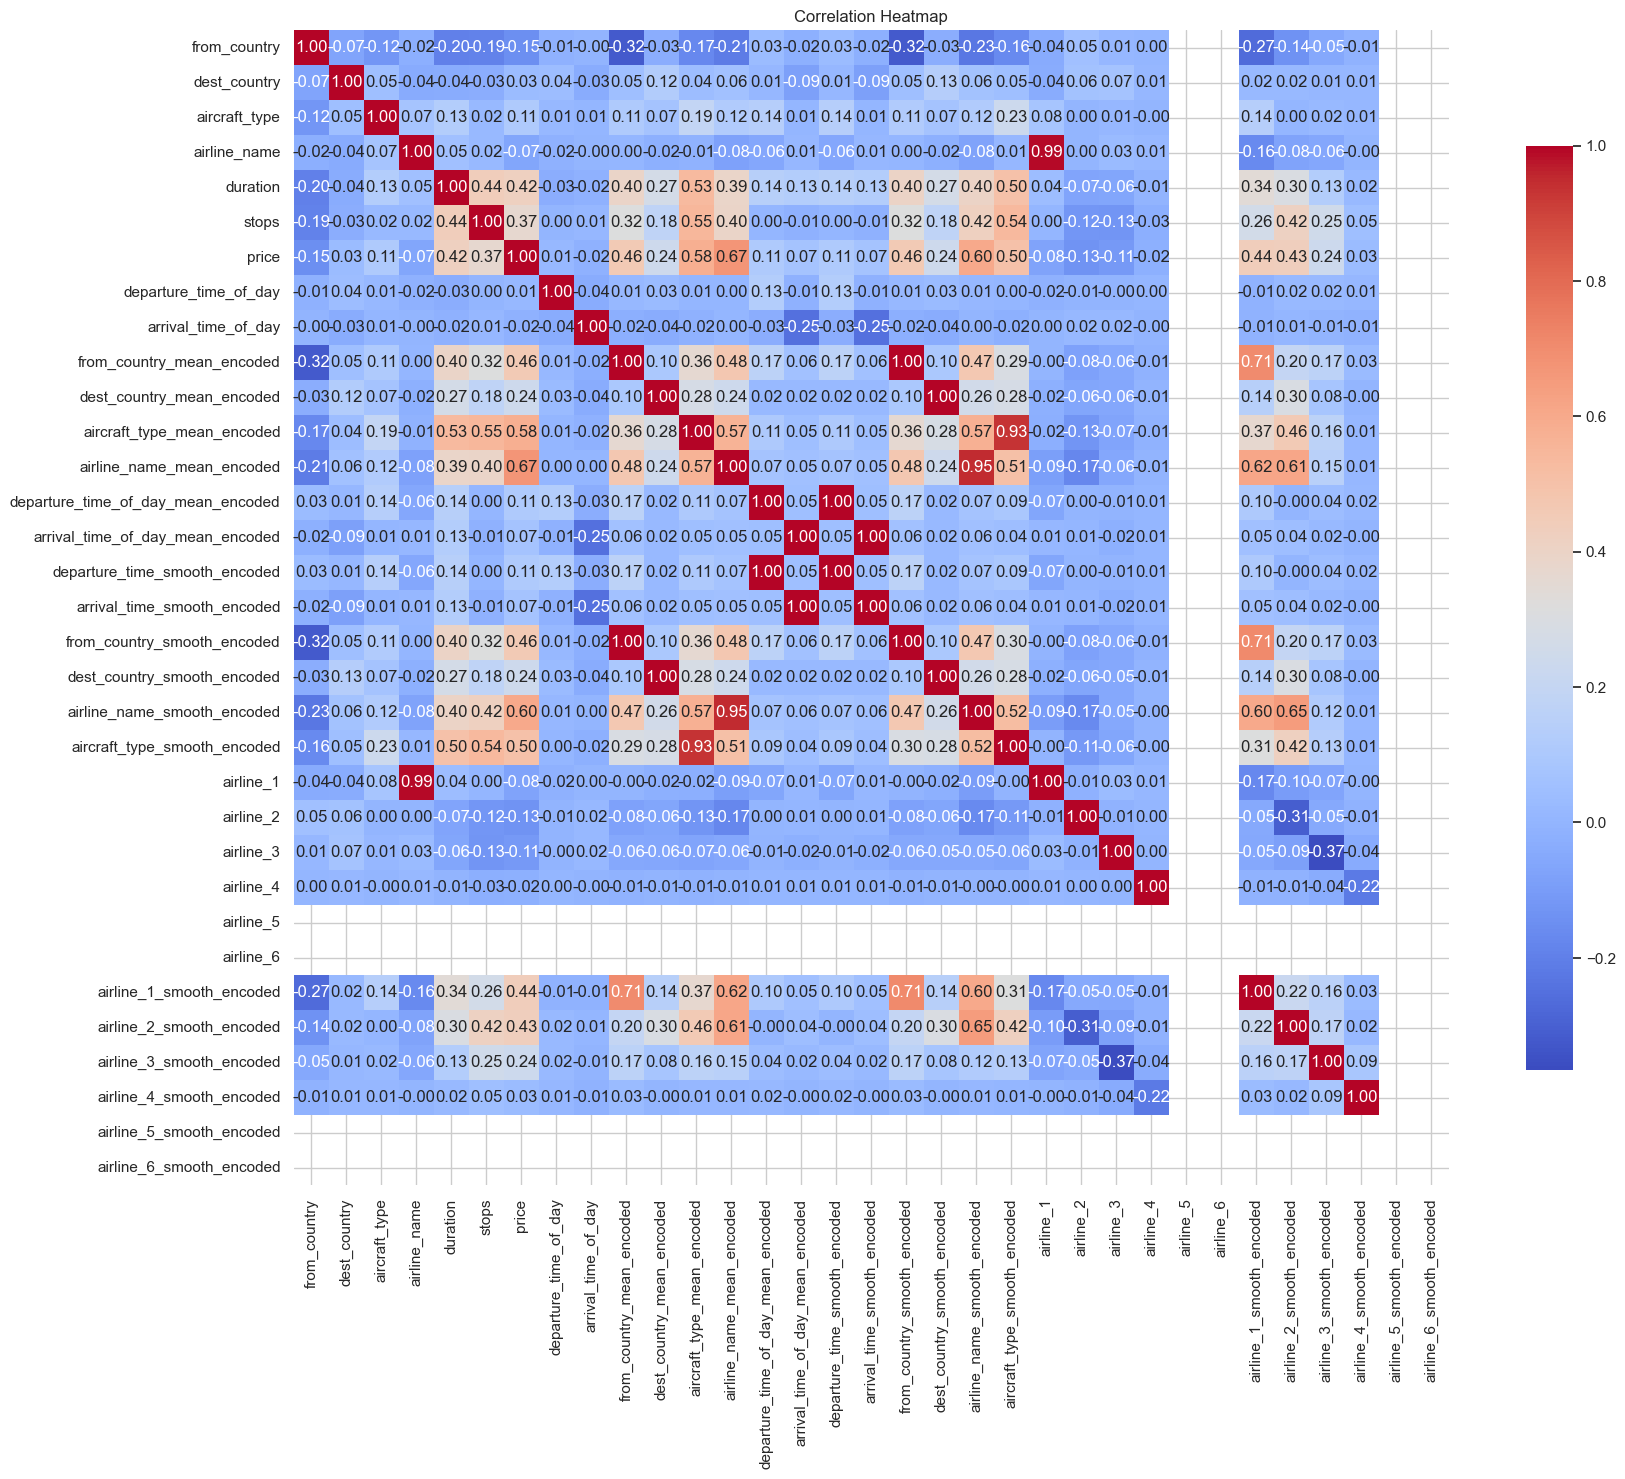

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

In [55]:
df.columns

Index(['from_country', 'dest_country', 'aircraft_type', 'airline_name',
       'duration', 'stops', 'price', 'departure_time_of_day',
       'arrival_time_of_day', 'from_country_mean_encoded',
       'dest_country_mean_encoded', 'aircraft_type_mean_encoded',
       'airline_name_mean_encoded', 'departure_time_of_day_mean_encoded',
       'arrival_time_of_day_mean_encoded', 'departure_time_smooth_encoded',
       'arrival_time_smooth_encoded', 'from_country_smooth_encoded',
       'dest_country_smooth_encoded', 'airline_name_smooth_encoded',
       'aircraft_type_smooth_encoded', 'airline_1', 'airline_2', 'airline_3',
       'airline_4', 'airline_5', 'airline_6', 'airline_1_smooth_encoded',
       'airline_2_smooth_encoded', 'airline_3_smooth_encoded',
       'airline_4_smooth_encoded', 'airline_5_smooth_encoded',
       'airline_6_smooth_encoded'],
      dtype='object')

In [56]:
# storing the Dependent Variables in X and Independent Variable in Y
# 'departure_time_of_day','arrival_time_of_day'
x=df.drop(columns=['price', 'departure_time_of_day', 'arrival_time_of_day'])

y=df['price']

### Train Test Split

In [57]:
# Splitting the Data into Training set and Testing Set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((69996, 30), (29999, 30), (69996,), (29999,))

In [58]:
# Scaling the values to convert the int values to Machine Languages
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)  

### Trainning

R² Score: 0.5846
Mean Squared Error: 597351.3003


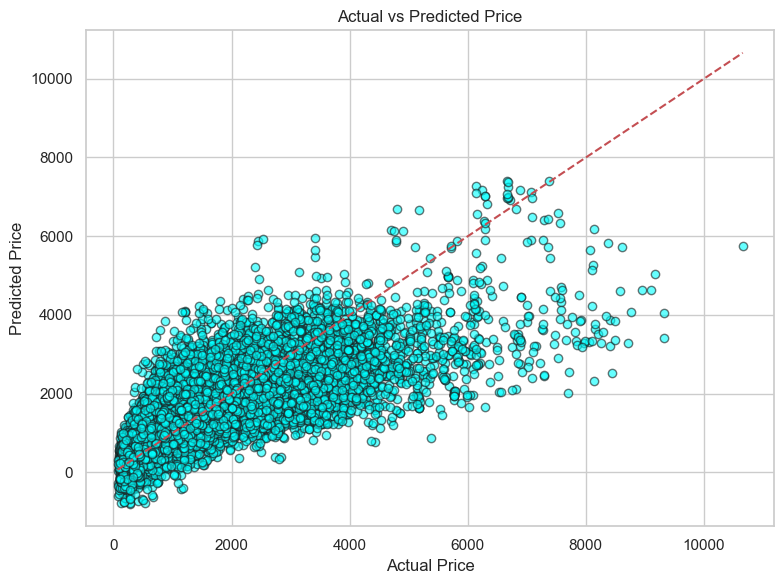

In [59]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Drop rows with missing values in selected columns

# Define X and y
X = df.drop(columns=['price'])
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# Plot predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='cyan', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.grid(True)
plt.tight_layout()
plt.show()

In [60]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define the model
ridge = Ridge()

# Define hyperparameter grid (alphas are regularization strengths)
param_grid = {'alpha': [0, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

# Grid search with cross-validation
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best model and hyperparameter
best_model = grid_search.best_estimator_
print("Best alpha:", grid_search.best_params_)

# Predictions
y_pred = best_model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")


Best alpha: {'alpha': 1000}
R² Score: 0.5845
Mean Squared Error: 597440.9030


R² Score: 0.6059
Mean Squared Error: 566714.7173


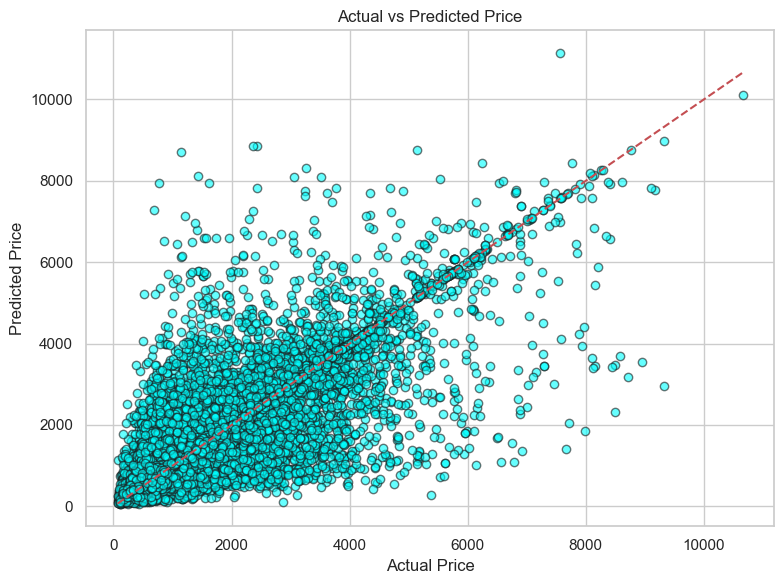

In [61]:
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Drop rows with missing values in selected columns

# Define X and y
X = df.drop(columns=['price'])
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the regression model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# Plot predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='cyan', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.grid(True)
plt.tight_layout()
plt.show()


R² Score: 0.7624
Mean Squared Error: 341609.2509


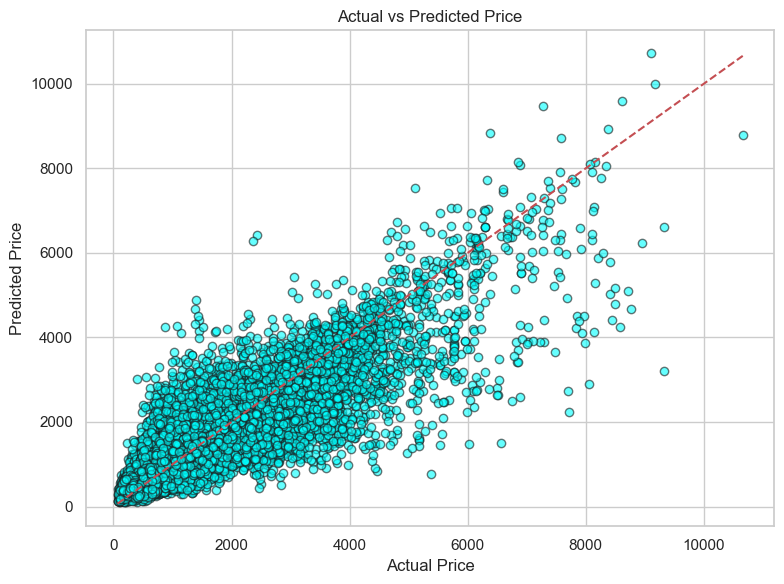

In [62]:
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Drop rows with missing values in selected columns

# Define X and y
X = df.drop(columns=['price'])
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the regression model
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# Plot predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='cyan', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.grid(True)
plt.tight_layout()
plt.show()


R² Score: 0.6884
Mean Squared Error: 448053.3011


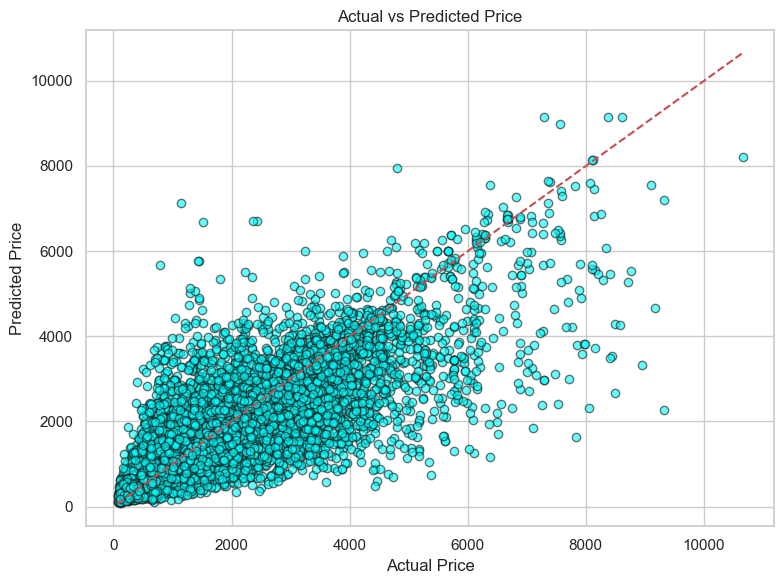

In [63]:
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Drop rows with missing values in selected columns

# Define X and y
X = df.drop(columns=['price'])
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the regression model
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# Plot predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='cyan', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.grid(True)
plt.tight_layout()
plt.show()


R² Score: 0.7611
Mean Squared Error: 343596.3262


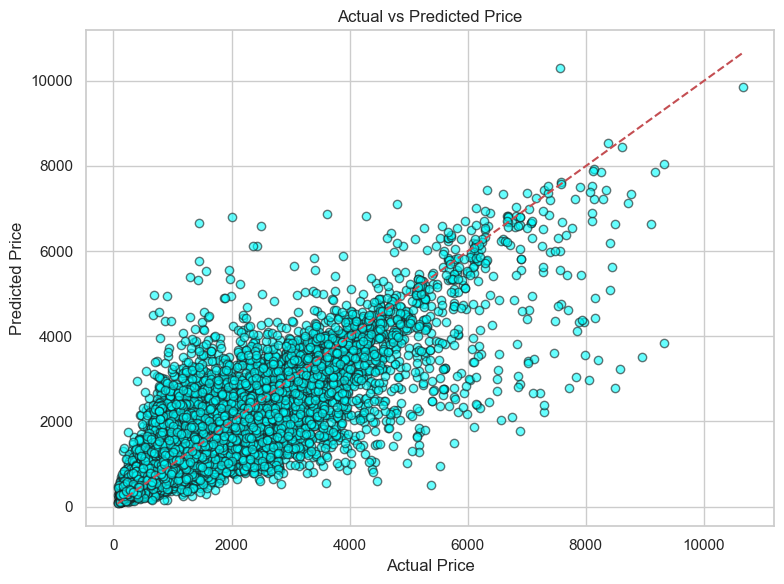

In [64]:
import seaborn as sns
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Drop rows with missing values in selected columns

# Define X and y
X = df.drop(columns=['price'])
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the regression model
model = BaggingRegressor()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# Plot predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='cyan', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.grid(True)
plt.tight_layout()
plt.show()


Learning rate set to 0.081821
0:	learn: 1141.3357418	total: 11.1ms	remaining: 11.1s
1:	learn: 1098.6612182	total: 19.9ms	remaining: 9.95s
2:	learn: 1059.6914581	total: 30.4ms	remaining: 10.1s
3:	learn: 1026.2575459	total: 39ms	remaining: 9.7s
4:	learn: 995.3420068	total: 47.9ms	remaining: 9.53s
5:	learn: 968.1023367	total: 57.1ms	remaining: 9.47s
6:	learn: 943.4454091	total: 66.2ms	remaining: 9.39s
7:	learn: 921.7292710	total: 74.9ms	remaining: 9.29s
8:	learn: 903.0048212	total: 83.8ms	remaining: 9.23s
9:	learn: 886.2224236	total: 92ms	remaining: 9.1s
10:	learn: 871.5542986	total: 100ms	remaining: 9s
11:	learn: 858.5673211	total: 110ms	remaining: 9.03s
12:	learn: 847.1520195	total: 119ms	remaining: 9.01s
13:	learn: 836.9820140	total: 128ms	remaining: 8.99s
14:	learn: 827.1885617	total: 137ms	remaining: 8.99s
15:	learn: 817.6353322	total: 146ms	remaining: 9s
16:	learn: 810.4387728	total: 154ms	remaining: 8.89s
17:	learn: 802.7207150	total: 162ms	remaining: 8.86s
18:	learn: 796.3918948	t

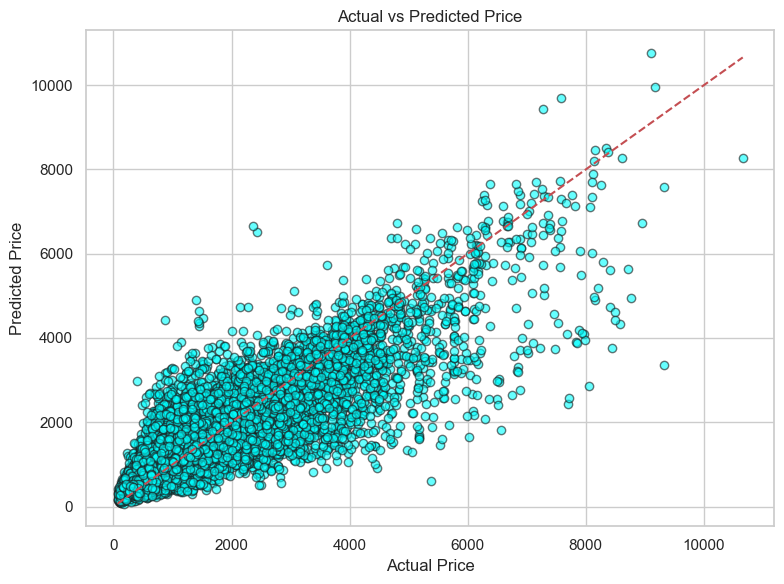

In [65]:
import seaborn as sns
from catboost import CatBoostRegressor 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Drop rows with missing values in selected columns

# Define X and y
X = df.drop(columns=['price'])
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the regression model
model = CatBoostRegressor(loss_function='RMSE')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# Plot predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='cyan', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.grid(True)
plt.tight_layout()
plt.show()


Linear Regression:
- R²: 0.5846, MSE: 597351.3003
------------------------------
Decision Tree:
- R²: 0.6059, MSE: 566714.7173
------------------------------
XGBoost:
- R²: 0.7624, MSE: 341609.2509
------------------------------
KNN Regressor:
- R²: 0.6884, MSE: 448053.3011
------------------------------
Bagging Regressor:
- R²: 0.7560, MSE: 350857.4473
------------------------------
CatBoost:
- R²: 0.7672, MSE: 334778.7332
------------------------------


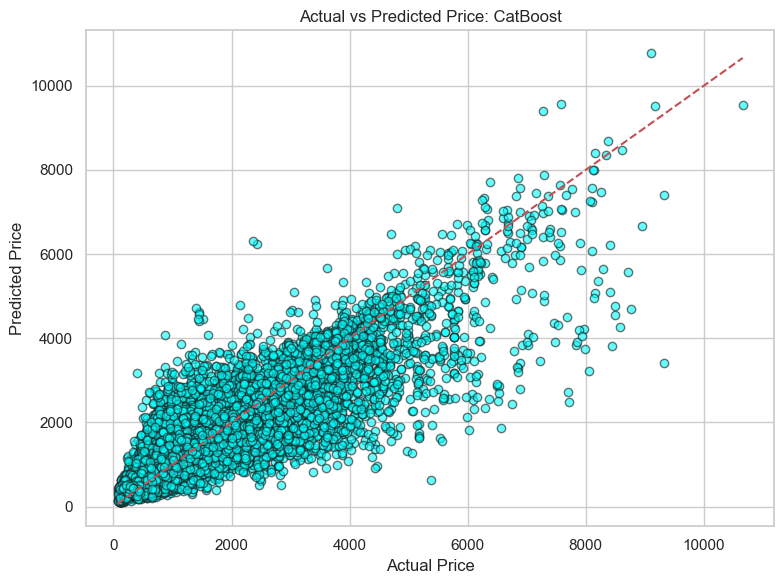

In [66]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Drop rows with missing values in selected columns
df = df.dropna(subset=['price'])  # adjust if needed

# Define X and y
X = df.drop(columns=['price'])
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    "KNN Regressor": KNeighborsRegressor(),
    "Bagging Regressor": BaggingRegressor(random_state=42),
    "CatBoost": CatBoostRegressor(verbose=0, loss_function='RMSE', random_state=42)
}

# Store results
results = {}

# Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = (r2, mse)
    print(f"{name}:")
    print(f"- R²: {r2:.4f}, MSE: {mse:.4f}")
    print("-" * 30)

# Plot: Actual vs Predicted for the best model (highest R²)
best_model_name = max(results, key=lambda k: results[k][0])
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6, color='cyan', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(f"Actual vs Predicted Price: {best_model_name}")
plt.grid(True)
plt.tight_layout()
plt.show()


In [67]:
# Predict on the test set
y_pred_best = best_model.predict(X_test)

# Create a copy of X_test to avoid modifying the original df
df_test = X_test.copy()

# Add actual and predicted prices
df_test['Actual Price'] = y_test.values
df_test['Predicted Price'] = y_pred_best

# Optional: see the head of the result
df_test.head(30)


from_country  dest_country  aircraft_type  airline_name   duration  \
33967             2            25           4768          3510  35.666667   
31049             2            44           4196          2238  29.250000   
53746            10            12           1112          3223   9.083333   
9732              5            15           2132          2440  29.916667   
7129              9            41           7199          1014  33.250000   
1402              4            35            932          1250  25.166667   
79015            15            27            377           457  28.250000   
9694             16             5           3666           154  28.583333   
7126             15            27            923          2864  24.183333   
41754             6            44           8285          1719   6.183333   
43296            17            17           1637          3725  30.000000   
25469            16             1           2296          2309  28.133333   
39187             2            10           5597          3017  28.750000   
57340            14             6           2260           163  20.833333   
26202            14             2           7115          2051  25.916667   
99982             5             6           5805          2176  18.333333   
11402            15            20            949          2641  30.750000   
8256              6             5            904           688  21.850000   
7162              4            28           7102          3662  26.833333   
28265            16             2           2350          2051  36.750000   
76545            14            17           7430          3725  16.666667   
89735            15            25           1028          2640   3.250000   
11147            11            35           7514          3104  24.666667   
93158            14            44           9328          3160  19.966667   
22177            17            44           7227          3626  27.766667   
86383            10            15           1598          3201   5.000000   
89248             6            44           8009           665   5.833333   
27966             8            23           7644            53  35.250000   
28717             2            45           7568             0  27.416667   
47902            15            43            598          1709  10.166667   

       stops  departure_time_of_day  arrival_time_of_day  \
33967      2                      3                    0   
31049      2                      4                    0   
53746      2                      3                    0   
9732       1                      3                    0   
7129       2                      4                    0   
1402       2                      2                    2   
79015      1                      2                    2   
9694       3                      3                    3   
7126       2                      3                    1   
41754      1                      0                    4   
43296      2                      2                    4   
25469      2                      2                    2   
39187      2                      0                    0   
57340      1                      4                    0   
26202      2                      3                    2   
99982      2                      0                    3   
11402      1                      2                    3   
8256       3                      3                    3   
7162       1                      3                    3   
28265      2                      0                    3   
76545      2                      4                    2   
89735      1                      3                    3   
11147      1                      3                    3   
93158      2                      3                    4   
22177      2                      1                    2   
86383      1                      0                    4   

### Hypertunning


Tuning: Linear Regression
Linear Regression - Best R²: 0.5846, Best MSE: 597351.3003

Tuning: Decision Tree
Decision Tree - Best R²: 0.6797, Best MSE: 460569.6184

Tuning: XGBoost
XGBoost - Best R²: 0.7685, Best MSE: 332928.7552

Tuning: KNN Regressor


c:\Users\punna\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


KNN Regressor - Best R²: 0.7111, Best MSE: 415483.7390

Tuning: Bagging Regressor


c:\Users\punna\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
8 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\punna\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\punna\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^
  File "c:\Users\punna\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
          

Bagging Regressor - Best R²: 0.7879, Best MSE: 305003.0175

Tuning: CatBoost
CatBoost - Best R²: 0.7605, Best MSE: 344395.9277


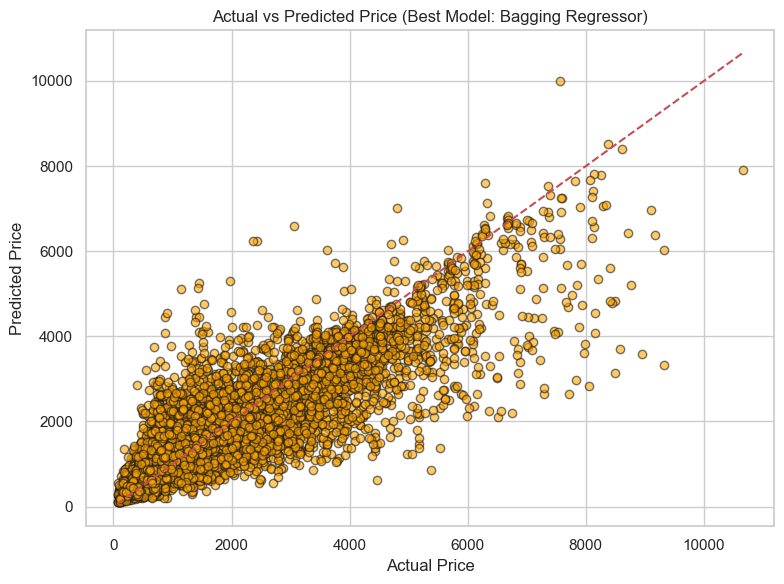

In [68]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define hyperparameter grids
param_grids = {
    "Linear Regression": {},  # No tunable hyperparameters usually
    "Decision Tree": {
        "max_depth": [None, 5, 10, 20],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "XGBoost": {
        "n_estimators": [100, 200, 300],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7],
        "subsample": [0.6, 0.8, 1.0]
    },
    "KNN Regressor": {
        "n_neighbors": [3, 5, 7, 9],
        "weights": ['uniform', 'distance']
    },
    "Bagging Regressor": {
        "n_estimators": [10, 50, 100],
        "max_samples": [0.5, 0.7, 1.0],
        "max_features": [0.5, 0.7, 1.0]
    },
    "CatBoost": {
        "iterations": [100, 200],
        "depth": [4, 6, 10],
        "learning_rate": [0.01, 0.1, 0.2]
    }
}

# Models
base_models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    "KNN Regressor": KNeighborsRegressor(),
    "Bagging Regressor": BaggingRegressor(random_state=42),
    "CatBoost": CatBoostRegressor(verbose=0, loss_function='RMSE', random_state=42)
}

# Store tuned models and results
best_models = {}
tuned_results = {}

# Tuning loop
for name, model in base_models.items():
    print(f"\nTuning: {name}")
    param_grid = param_grids[name]
    if param_grid:
        search = RandomizedSearchCV(model, param_grid, n_iter=10, cv=3, scoring='r2', random_state=42, n_jobs=-1)
    else:
        search = model  # No tuning for linear regression

    if isinstance(search, RandomizedSearchCV):
        search.fit(X_train, y_train)
        best_model = search.best_estimator_
    else:
        search.fit(X_train, y_train)
        best_model = search

    y_pred = best_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    best_models[name] = best_model
    tuned_results[name] = (r2, mse)

    print(f"{name} - Best R²: {r2:.4f}, Best MSE: {mse:.4f}")

# Plot best model
best_model_name = max(tuned_results, key=lambda k: tuned_results[k][0])
y_pred_best = best_models[best_model_name].predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6, color='orange', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(f"Actual vs Predicted Price (Best Model: {best_model_name})")
plt.grid(True)
plt.tight_layout()
plt.show()
